<center><font size="16">Bank Data: EDA for Machine Learning</font></center>

In this notebook, we will see how to dig deep into the data for insights and visualize it.

### Data

The Porteuguese Bank marketing data set is taken from UCI repository:https://archive.ics.uci.edu/ml/datasets/bank+marketing

- bank data (bankdata.csv)

The data set enclosed following instances and features:<br>

 **Input variables**:
 
   # bank client data:
   
   1 - age (numeric)<br>
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") <br>
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)<br>
   4 - education (categorical: "unknown","secondary","primary","tertiary")<br>
   5 - default: has credit in default? (binary: "yes","no")<br>
   6 - balance: average yearly balance, in euros (numeric) <br>
   7 - housing: has housing loan? (binary: "yes","no")<br>
   8 - loan: has personal loan? (binary: "yes","no")<br>
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") <br>
   
   # Related with the contact records in the current campaign:<br>
  
  10 - day: last contact day of the month (numeric)<br>
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")<br>
  12 - duration: last contact duration, in seconds (numeric)<br>
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
  
   # Previous Campaign attributes:<br>
   
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means            client was not previously contacted)<br>
  15 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")<br>

 **Output variable (desired target)**:<br>
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")<br>



### Data Dictionary

<center>
<table class="table table-bordered">
<tr>
<th style="width:5%">Variable</th><th style="width:5%">Data type</th><th style="width:5%">instance values</th>
</tr>
<tr>
<td>Output(Y)</td>
<td>binary</td>
<td>client subscribed the new campaign 0 = No, 1 = Yes</td>
</tr>
<tr>
<td>Age</td>
<td>numeric value of age in Years</td>
<td>18-95 years</td>
</tr>
<tr>
<td>Job</td>
<td>object values</td>
<td>i.e admin,managment,technical etc</td>
</tr>
<tr>
<td>Marital</td>
<td>marital status</td>
<td>married,single,divorced(includes widowed)</td>
</tr>
<tr>
<td>Education</td>
<td>categorical</td>
<td>("unknown","secondary","primary","tertiary")</td>
</tr>
<tr>
<td>default</td>
<td>binary</td>
<td>("yes","no")</td>
</tr>
<tr>
<td>Balance</td>
<td>numeric</td>
<td>average yearly balance, in euros</td>
</tr>
<tr>
<td>Housing</td>
<td>binary</td>
<td>has housing loan? ("yes","no")</td>
</tr>
<tr>
<td>Loan</td>
<td>binary</td>
<td>has personal loan? ("yes","no")</td>
</tr>
<tr>
<td>Contact</td>
<td>categorical</td>
<td>contact communication type ("unknown","telephone","cellular")</td>
</tr>
<tr>
<td>Day</td>
<td>numeric</td>
<td>last contact day of the month</td>
</tr>
<tr>
<td>Month</td>
<td>categorical</td>
<td>last contact month of year ("jan", "feb", "mar", ..., "nov", "dec")</td>
</tr> 
<tr>
<td>Duration</td>
<td>numeric</td>
<td>last contact duration, in seconds</td>
</tr>
<tr>
<td>Compaign</td>
<td>numeric</td>
<td>number of contacts performed during this campaign and for this client (includes last contact)</td>
</tr>
<tr>
<td>Pdays</td>
<td>numeric</td>
<td>number of days that passed by after the client was last contacted from a previous campaign (-1 means            client was not previously contacted</td>
</tr>
<tr>
<td>previous</td>
<td>numeric</td>
<td> number of contacts performed before this campaign and for this client</td>
</tr>
<tr>
<td>Poutcome</td>
<td>categorical</td>
<td> outcome of the previous marketing campaign ("unknown","other","failure","success")</td>
</tr>
</table>
</center>

# Wrangling & EDA

## 1. Loading Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

## 2. Loading Data for Basic Analysis

It is imporatant to make a copy of data first, as in future if we corrupt the df (data frame) by accident then we must have a copy to read data.

In [2]:
#My main data set for operations and analysis
data = pd.read_csv('bank-full.csv')
df_eda = data.copy()

### Basic Structure

We can use the method **type** to check the overall nature of data:

In [4]:
#Type of main data set
type(df_eda)

pandas.core.frame.DataFrame

We can use the method **shape()** to know the total number of rows and columns of a dataframe:

In [6]:
#Shape of main data set
df_eda.shape

(45211, 17)

so we have 45211 rows and 17 columns (16 input and 1 target variable)

We can use the method **head()** to examine the first five rows of a dataframe:

In [8]:
#by default head() shows top 5 rows with columns name.
df_eda.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


We can use the method **tail()** to examine the last five rows of a dataframe:

In [9]:
#last 5 rows of my main data set
df_eda.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


We use this to find the title of each column:

In [11]:
df_eda.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

we  use this to find data type of each column:

In [13]:
#dtype of each column in main data set
df_eda.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

We can use the method **describe()** to examine the summary of a dataframe except the object type data columns:

In [15]:
df_eda.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


We can use the method **describe(include=["o"])** to examine the summary of object type data columns of a dataframe:

In [17]:
df_eda.describe(include=["O"])

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


We can use the method **describe(include='all')** to examine the summary of all data columns of a dataframe:

In [19]:
df_eda.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


### Completeness

Finding the null(NAN) or missing values among the columns in dataframe:

In [21]:
df_eda.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

There is no null or missing values in our dataset

In [23]:
#if there is any nan or missing values it gives true on that particualar space.
df_eda.isnull()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45207,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45208,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45209,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### Understand the data of every column:

Finding unique values,total number of counts of each unique value,minimum/maximum values in each column, in the data Set:


In [25]:
#Unique values in target variable y
df_eda['y'].unique()

array(['no', 'yes'], dtype=object)

In [27]:
# counts of unique values in the column
df_eda['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

so our main dataset have more values of no subscription which is 39922 in counts.

In [29]:
df_eda['y'].describe(include= 'all')

count     45211
unique        2
top          no
freq      39922
Name: y, dtype: object

summary of target variable also rcommends that no values are higher than yes.which are 39922

In [31]:
df_eda['age'].unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88], dtype=int64)

In [33]:
df_eda['age'].min()

18

In [35]:
df_eda['age'].max()

95

In our main data set, age values are in range of 18-95.

In [37]:
#Counts of every age in our main dataset.Top 40 values.
df_eda['age'].value_counts().head(40)

32    2085
31    1996
33    1972
34    1930
35    1894
36    1806
30    1757
37    1696
39    1487
38    1466
40    1355
41    1291
42    1242
45    1216
29    1185
46    1175
43    1161
44    1136
47    1088
28    1038
48     997
49     994
50     939
51     936
52     911
27     909
53     891
57     828
54     811
55     806
26     805
56     778
59     770
58     740
60     596
25     527
24     302
23     202
61     147
22     129
Name: age, dtype: int64

In [38]:
df_eda['age'].value_counts().tail(38)

22    129
62     80
21     79
63     77
64     74
70     67
66     63
65     59
67     54
71     54
72     52
20     50
77     44
73     44
69     44
75     39
74     37
68     36
19     35
76     32
80     31
78     30
79     25
83     22
82     19
81     17
18     12
84      9
86      9
85      5
87      4
89      3
88      2
90      2
92      2
93      2
95      2
94      1
Name: age, dtype: int64

In [39]:
#Summary of age column
df_eda['age'].describe(include= 'all')

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

same analysis for job and other columns.

In [40]:
df_eda['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [41]:
# top job in our main dataset
df_eda['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [49]:
#Summary of job column.
df_eda['job'].describe(include= 'all')

count           45211
unique             12
top       blue-collar
freq             9732
Name: job, dtype: object

In [51]:
#unique values for marital column
df_eda['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [52]:
#counts in martial column
df_eda['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [53]:
#Summary of marital column
df_eda['marital'].describe(include='all')

count       45211
unique          3
top       married
freq        27214
Name: marital, dtype: object

In [55]:
#unique values in eduaction column
df_eda['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [56]:
#value counts in education column
df_eda['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [57]:
#Summary of education column
df_eda['education'].describe(include='all')

count         45211
unique            4
top       secondary
freq          23202
Name: education, dtype: object

In [59]:
#unique values in default column
df_eda['default'].unique()

array(['no', 'yes'], dtype=object)

In [60]:
#value counts of default column
df_eda['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [62]:
#Summary of Default column
df_eda['default'].describe(include='all')

count     45211
unique        2
top          no
freq      44396
Name: default, dtype: object

In [64]:
#unique values in balance column
df_eda['balance'].unique()

array([ 2143,    29,     2, ...,  8205, 14204, 16353], dtype=int64)

In [65]:
#minimum average balance in euros in main dataset
df_eda['balance'].min()

-8019

In [67]:
#Maximum balance in our main dataset
df_eda['balance'].max()

102127

In [69]:
#value counts of balance column
df_eda['balance'].value_counts()

0        3514
1         195
2         156
4         139
3         134
         ... 
4305        1
6352        1
18881       1
14889       1
7218        1
Name: balance, Length: 7168, dtype: int64

In [70]:
#Summary of balance column
df_eda['balance'].describe(include='all')

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

In [72]:
#unique values in housing column
df_eda['housing'].unique()

array(['yes', 'no'], dtype=object)

In [73]:
#value counts in housing column
df_eda['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [75]:
#Summary of housing column
df_eda['housing'].describe(include='all')

count     45211
unique        2
top         yes
freq      25130
Name: housing, dtype: object

In [77]:
#unique values in loan column
df_eda['loan'].unique()

array(['no', 'yes'], dtype=object)

In [78]:
#value counts in loan column
df_eda['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [80]:
#Summary of loan column
df_eda['loan'].describe(include='all')

count     45211
unique        2
top          no
freq      37967
Name: loan, dtype: object

In [82]:
#unique values in contact column
df_eda['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [83]:
#value counts in contact column
df_eda['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [85]:
#Summary of contact column
df_eda['contact'].describe(include='all')

count        45211
unique           3
top       cellular
freq         29285
Name: contact, dtype: object

In [87]:
#unique values in day column
df_eda['day'].unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31],
      dtype=int64)

In [88]:
#value counts in day column
df_eda['day'].value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

In [89]:
df_eda['day'].min()

1

In [91]:
df_eda['day'].max()

31

In [92]:
#Summary of day column
df_eda['day'].describe(include='all')

count    45211.000000
mean        15.806419
std          8.322476
min          1.000000
25%          8.000000
50%         16.000000
75%         21.000000
max         31.000000
Name: day, dtype: float64

In [93]:
#unique values in month column
df_eda['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [94]:
#value counts in month column
df_eda['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [95]:
#Summary of month column
df_eda['month'].describe(include='all')

count     45211
unique       12
top         may
freq      13766
Name: month, dtype: object

In [96]:
#unique values in duration column
df_eda['duration'].unique()

array([ 261,  151,   76, ..., 1298, 1246, 1556], dtype=int64)

In [97]:
# value counts in duration column
df_eda['duration'].value_counts()

124     188
90      184
89      177
122     175
104     175
       ... 
2150      1
1970      1
1906      1
1842      1
2015      1
Name: duration, Length: 1573, dtype: int64

In [98]:
#didn't call min value
df_eda['duration'].min()

0

In [99]:
df_eda['duration'].max()

4918

In [100]:
#Summary of duration column
df_eda['duration'].describe(include='all')

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [101]:
#unique values in campaign column
df_eda['campaign'].unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44],
      dtype=int64)

In [102]:
#value counts in campaign column
df_eda['campaign'].value_counts()

1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
23       22
25       22
24       20
28       16
29       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
41        2
50        2
37        2
51        1
55        1
46        1
58        1
44        1
39        1
63        1
Name: campaign, dtype: int64

In [103]:
df_eda['campaign'].min()

1

In [104]:
df_eda['campaign'].max()

63

In [105]:
#Summary of campaign column
df_eda['campaign'].describe(include='all')

count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64

In [106]:
#unique values in pdays column
df_eda['pdays'].unique()

array([ -1, 151, 166,  91,  86, 143, 147,  89, 140, 176, 101, 174, 170,
       167, 195, 165, 129, 188, 196, 172, 118, 119, 104, 171, 117, 164,
       132, 131, 123, 159, 186, 111, 115, 116, 173, 178, 110, 152,  96,
       103, 150, 175, 193, 181, 185, 154, 145, 138, 126, 180, 109, 158,
       168,  97, 182, 127, 130, 194, 125, 105, 102,  26, 179,  28, 183,
       155, 112, 120, 137, 124, 187, 190, 113, 162, 134, 169, 189,   8,
       144, 191, 184, 177,   5,  99, 133,  93,  92,  10, 100, 156, 198,
       106, 153, 146, 128,   7, 121, 160, 107,  90,  27, 197, 136, 139,
       122, 157, 149, 135,  30, 114,  98, 192, 163,  34,  95, 141,  31,
       199,  94, 108,  29, 268, 247, 253, 226, 244, 239, 245, 204, 231,
       238, 258, 230, 254, 265,  71, 223, 246, 250, 266, 240, 205, 261,
       259, 241, 260, 234, 251, 225, 161, 237, 262, 248, 255, 220, 227,
       206, 224, 249, 235, 228, 263,   2, 270, 232, 252, 207, 200, 269,
       233, 256, 273, 272, 242, 264, 208, 214, 222, 271, 203, 22

In [107]:
#Value counts in pdays column
df_eda['pdays'].value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

In [108]:
#-1 shows didn't call in previous campaign
df_eda['pdays'].min()

-1

In [109]:
df_eda['pdays'].max()

871

In [110]:
#Summary of pdays column
df_eda['pdays'].describe(include='all')

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [111]:
#unique values in previous column
df_eda['previous'].unique()

array([  0,   3,   1,   4,   2,  11,  16,   6,   5,  10,  12,   7,  18,
         9,  21,   8,  14,  15,  26,  37,  13,  25,  20,  27,  17,  23,
        38,  29,  24,  51, 275,  22,  19,  30,  58,  28,  32,  40,  55,
        35,  41], dtype=int64)

In [112]:
#Value counts in previous column
df_eda['previous'].value_counts()

0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
23         8
20         8
22         6
18         6
24         5
27         5
29         4
25         4
21         4
30         3
28         2
26         2
37         2
38         2
55         1
40         1
35         1
58         1
51         1
41         1
32         1
275        1
Name: previous, dtype: int64

In [113]:
df_eda['previous'].min()

0

In [114]:
df_eda['previous'].max()

275

In [115]:
#Summary of previous column
df_eda['previous'].describe(include='all')

count    45211.000000
mean         0.580323
std          2.303441
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64

In [116]:
#unique values in poutcome column
df_eda['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [117]:
#value counts in poutcome column
df_eda['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [119]:
#Summary of Poutcome column
df_eda['poutcome'].describe(include='all')

count       45211
unique          4
top       unknown
freq        36959
Name: poutcome, dtype: object

Results of basic analysis: There are total 45211 rows 17 columns in our main dataset.'y' is our target column with 2 unique values.we donot have any missing values.we have explored the summaries, unique value counts and dtypes of each column in above basic analysis.

## 3. Exploration with visualization

### 3.1 Exploration of Complete & Important Variables


Some graphs are small in size due to less space. kindly double click the plots to enlarge those to see.

In [3]:
df_eda.y.value_counts(normalize=True)

no     0.883015
yes    0.116985
Name: y, dtype: float64

As our target variable is highly imbalanced values but not severely imbalanced. Around 12% of data have 'yes' values.

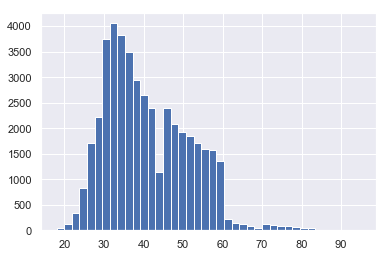

In [9]:
#histogtram of age variable for skewness
df_eda['age'].hist(bins=40)

As we can see the histogram of age variable data shows right skewness.

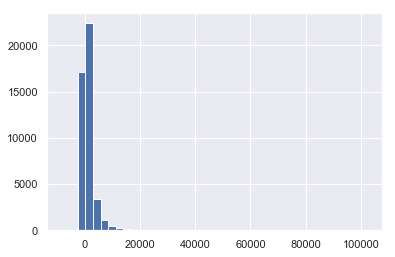

In [12]:
df_eda['balance'].hist(bins=40)

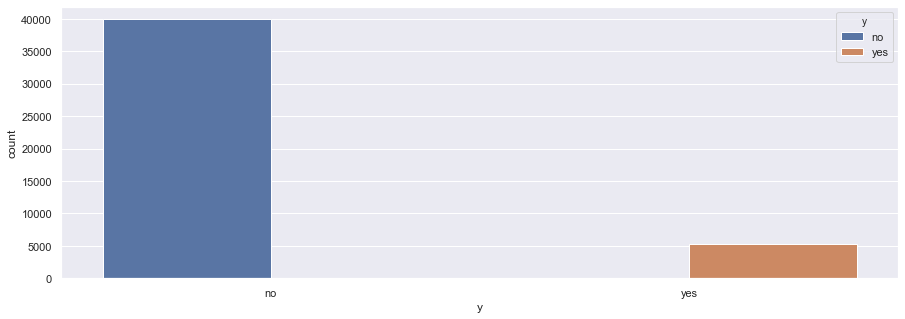

In [121]:
#plot visualize the unique values with counts in target variable
plt.figure(figsize=(15,5))
sns.countplot(x='y', hue='y', data=df_eda);

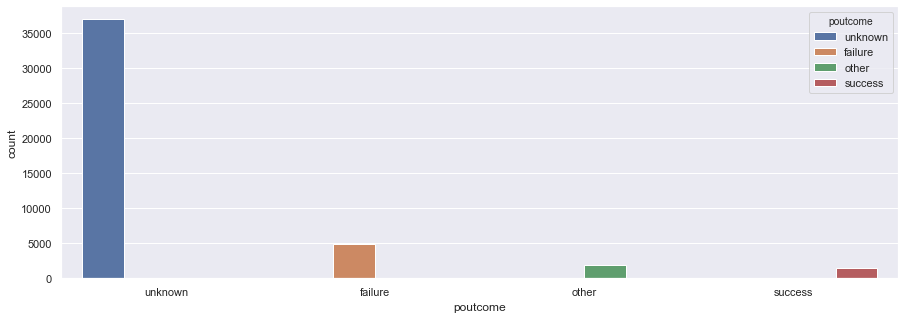

In [122]:
#Plot shows the unique values with counts of previous campaign outcome.
plt.figure(figsize=(15,5))
sns.countplot(x='poutcome', hue='poutcome', data=df_eda);

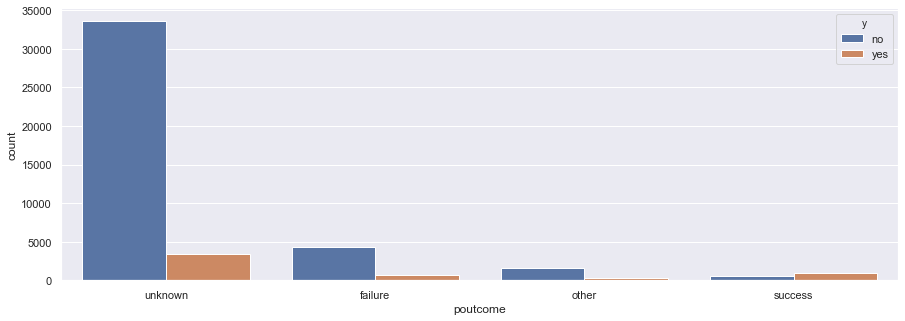

In [123]:
#Plot shows the comparison of target variable values of this campaign with previous campaign outcome.
plt.figure(figsize=(15,5))
sns.countplot(x='poutcome', hue='y', data=df_eda);

Analysis Result: above plot results shows that more people subscribe the term yes with success in previous outcome also people subscribes yes from unkown result in previous campaign. To start the marketing campaign starts from those which successfully use your previous products or avail your services.

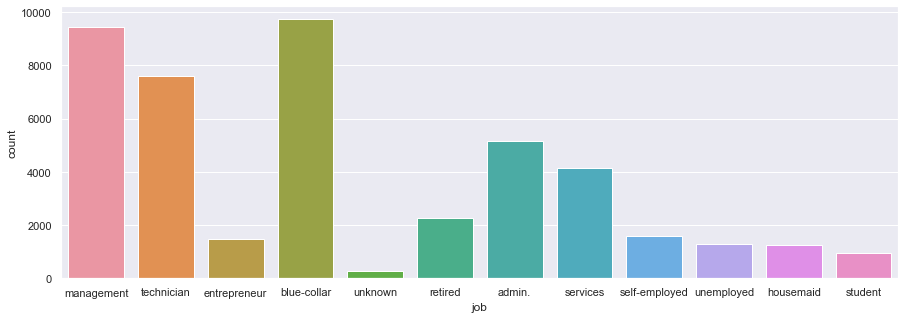

In [124]:
#unique values with counts of job column
plt.figure(figsize=(15,5))
sns.countplot(x='job', data=df_eda);

In [18]:
#totalcounts of values in job column with reference to 'yes' and 'no' values of target variable 'y'
total_count_in_each_group=[]
yes_count=[]
no_count=[]
title=[]
for i in df_eda['job'].value_counts().index:
  df_job=pd.DataFrame()
  df_job=df_eda[df_eda['job']==i]
  title.append(i)
  total_count_in_each_group.append(df_job.shape[0])
  yes_count.append(df_job[df_job['y']=='yes'].count()['y'])
  no_count.append(df_job[df_job['y']=='no'].count()['y'])
df_jobs=pd.DataFrame()
df_jobs['Job Title']=title
df_jobs['Total']=total_count_in_each_group
df_jobs['Yes']=yes_count
df_jobs['No']=no_count
df_jobs

,Job Title,Total,Yes,No
0,blue-collar,9732,708,9024
1,management,9458,1301,8157
2,technician,7597,840,6757
3,admin.,5171,631,4540
4,services,4154,369,3785
5,retired,2264,516,1748
6,self-employed,1579,187,1392
7,entrepreneur,1487,123,1364
8,unemployed,1303,202,1101
9,housemaid,1240,109,1131


([<matplotlib.axis.XTick at 0x1747bdf96d8>,
 <a list of 12 Text xticklabel objects>)

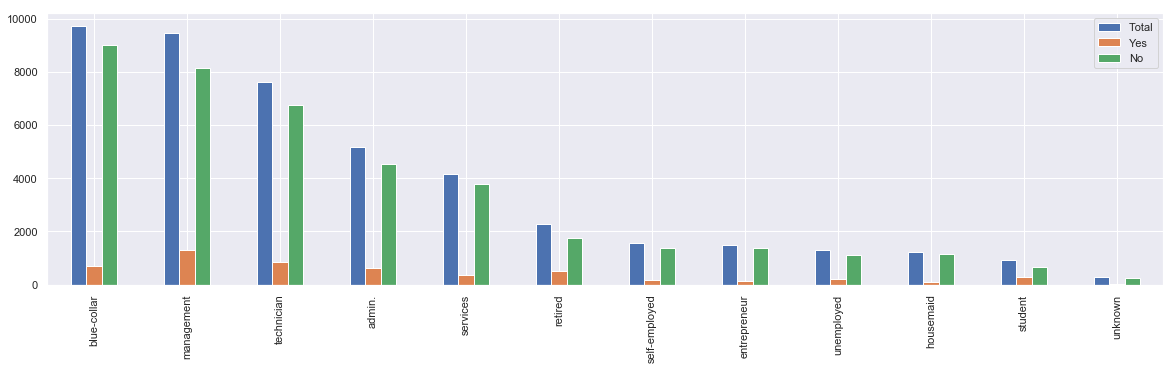

In [19]:
#Plot showing above result (total counts values of job column with yes and no values of target variable)
labels=df_jobs['Job Title']
positions = np.arange(0,12,1)
df_jobs.plot(kind='bar',figsize=(20,5))
plt.xticks(positions, labels)

Analysis Result:: bluecollar job people are higher in counts.management job people have higher counts of 'yes' value for target variable.but the percentage proportion of 'yes' value is good in retired and student type job people.

C:\Users\fahim\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 7200x1440 with 0 Axes>

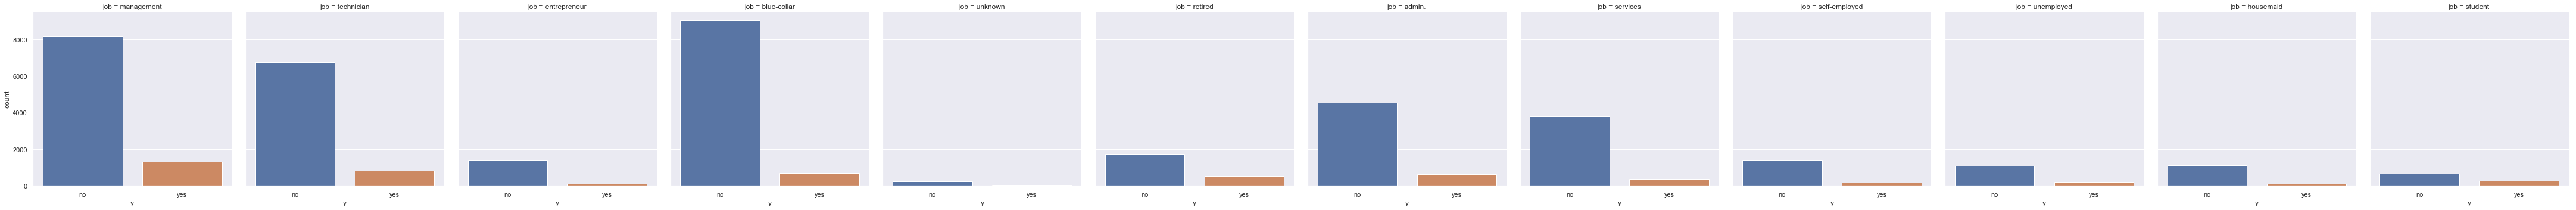

In [6]:
#individual plots of each job with counts of values of job column with target variable values.
plt.figure(figsize=(100,20))
sns.factorplot(x='y', col='job', data=df_eda, kind='count');

<Figure size 1080x360 with 0 Axes>

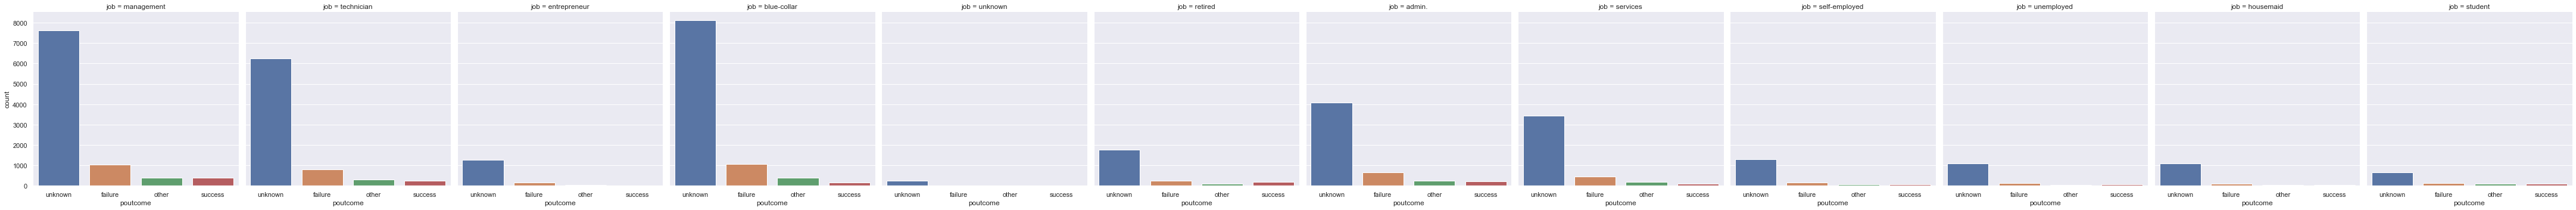

In [126]:
#values counts of job column with poutcome (previous campaign outcome) column.
plt.figure(figsize=(15,5))
sns.factorplot(x='poutcome', col='job', data=df_eda, kind='count');

Analysis result: shows management, technician and blue-collar job holders are more tends towards banking products campaign.

<Figure size 1080x360 with 0 Axes>

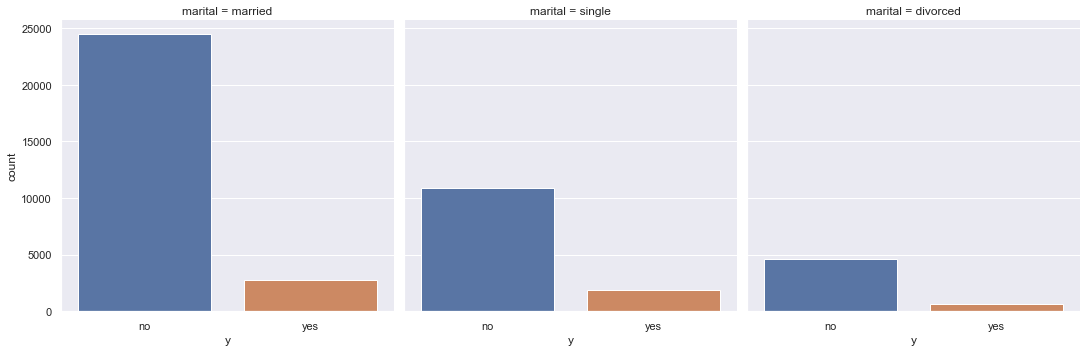

In [127]:
#Plot for value counts of marital column with target variable values
plt.figure(figsize=(15,5))
sns.factorplot(x='y', col='marital', data=df_eda, kind='count');

<Figure size 1080x360 with 0 Axes>

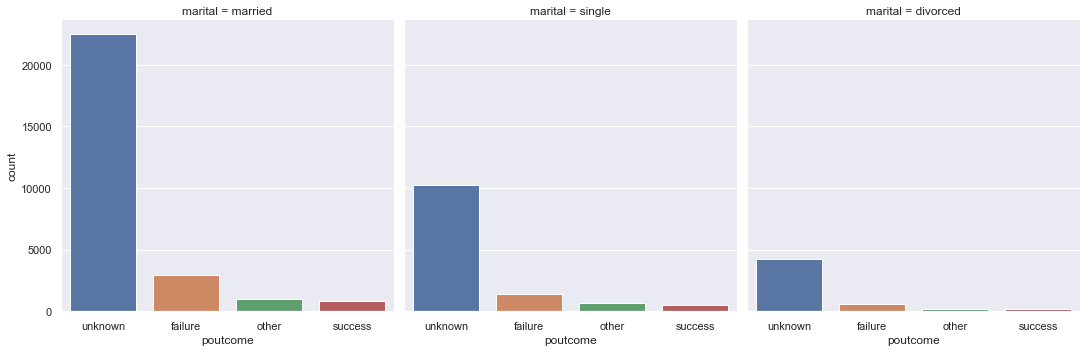

In [128]:
#Plot shows the value counts of marital column with poutcome column values.
plt.figure(figsize=(15,5))
sns.factorplot(x='poutcome', col='marital', data=df_eda, kind='count');

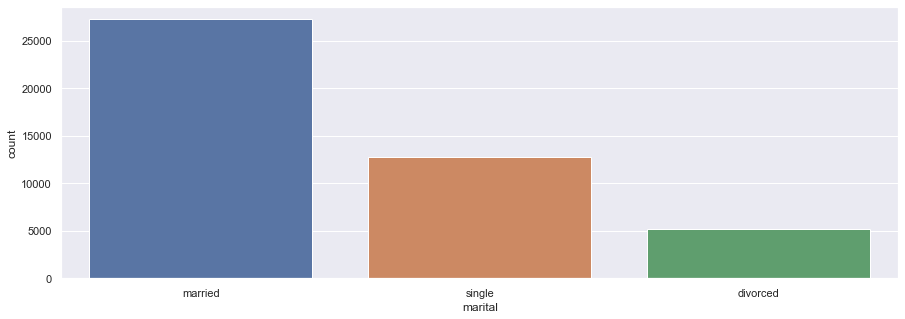

In [129]:
#Plot with counts of unique marital column values
plt.figure(figsize=(15,5))
sns.countplot(x='marital', data=df_eda);

Analysis result: data suggest that we have more married people counts and the campaign success depends on product for different marital status people. i.e education plan would be successfull amog married people with children. single marital status people would not consider child education plan.

<Figure size 1080x360 with 0 Axes>

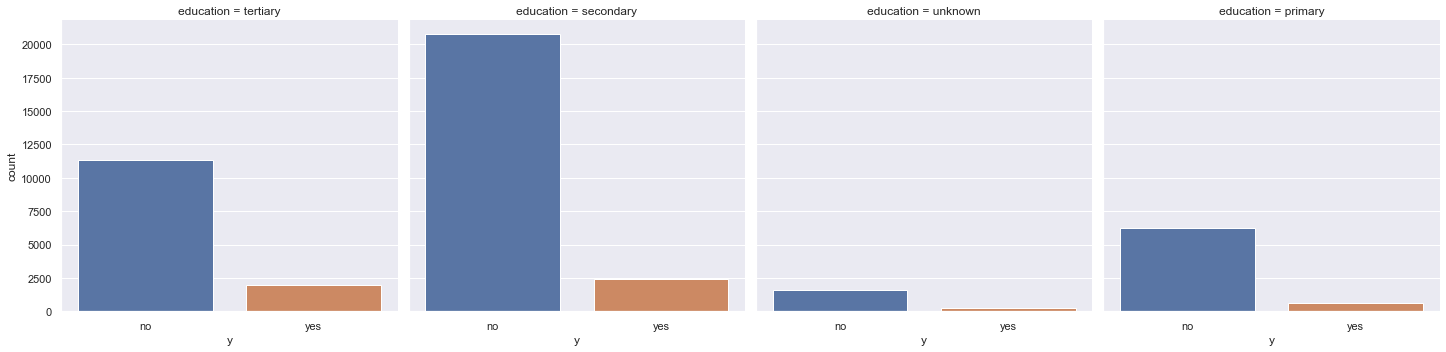

In [130]:
#Plot of value counts of education column with target variable column.
plt.figure(figsize=(15,5))
sns.factorplot(x='y', col='education', data=df_eda, kind='count');

<Figure size 1080x360 with 0 Axes>

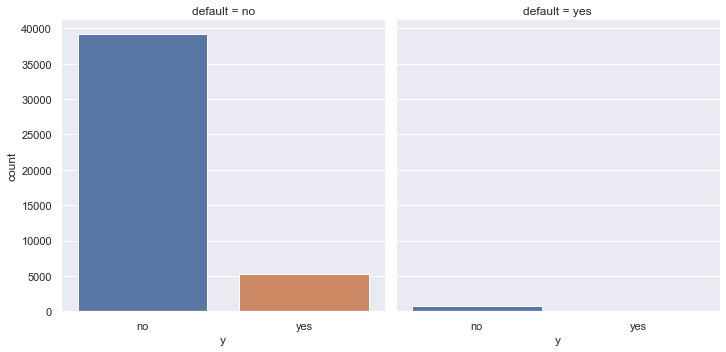

In [131]:
#Plot of value counts of default column with target variable values.
plt.figure(figsize=(15,5))
sns.factorplot(x='y', col='default', data=df_eda, kind='count');

Analysis result: Don't consider the people with yes default status

<Figure size 1080x360 with 0 Axes>

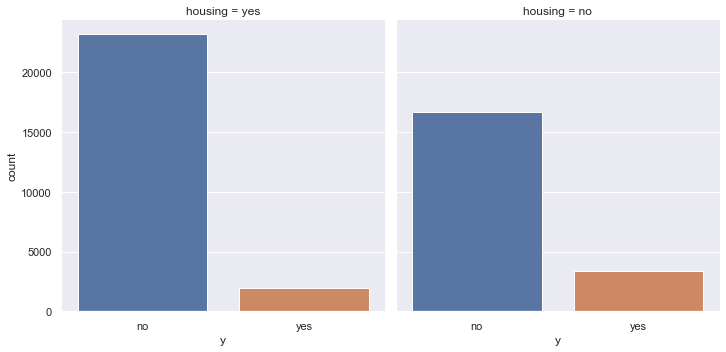

In [132]:
# Plot shows the value counts of housing column with target variable values.
plt.figure(figsize=(15,5))
sns.factorplot(x='y', col='housing', data=df_eda, kind='count');

Analysis Result: People with no mortgage status are more willing to subscribe some new bank product.

<Figure size 1080x360 with 0 Axes>

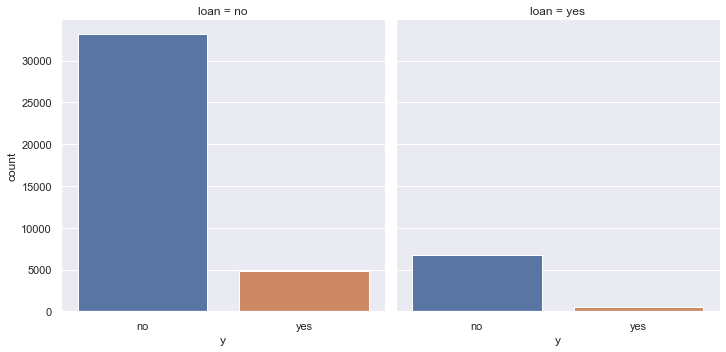

In [133]:
#Plot shows the value counts of loan column with target variable values.
plt.figure(figsize=(15,5))
sns.factorplot(x='y', col='loan', data=df_eda, kind='count');

<Figure size 1080x360 with 0 Axes>

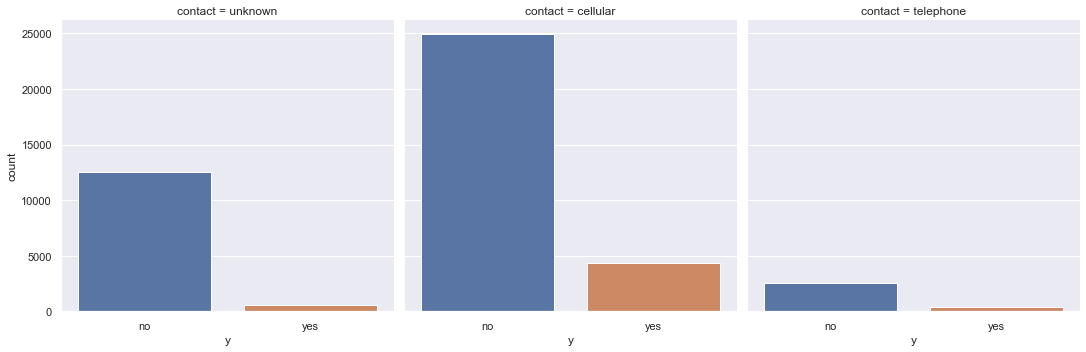

In [134]:
#plot shows the counts of unique values in contact column with target variable values.
plt.figure(figsize=(15,5))
sns.factorplot(x='y', col='contact', data=df_eda, kind='count');

<Figure size 1080x360 with 0 Axes>

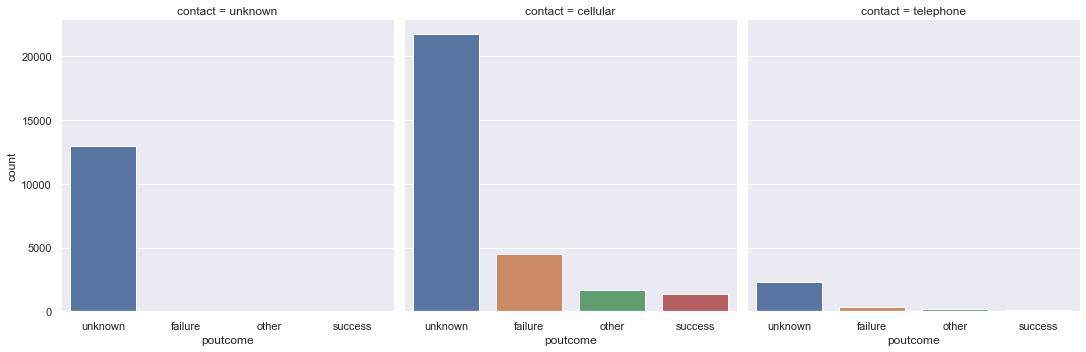

In [135]:
#Plot shows counts of unique values of contact column with target variable values.
plt.figure(figsize=(15,5))
sns.factorplot(x='poutcome', col='contact', data=df_eda, kind='count');

Analysis result: Concentrate on people with cellular contact for marketing campaign of banking products.

<Figure size 1080x360 with 0 Axes>

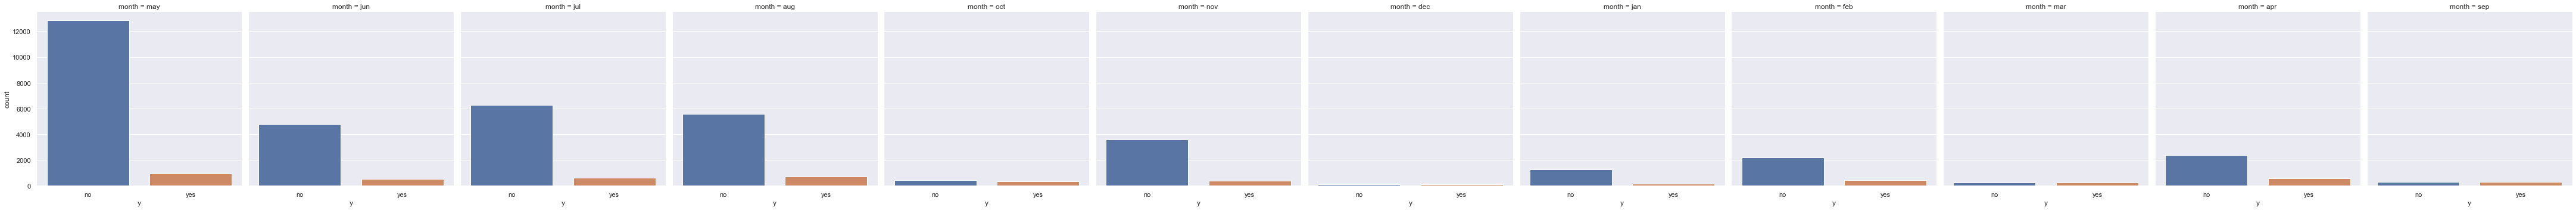

In [136]:
#Plot shows the counts of unique values of month column with target variable values.
plt.figure(figsize=(15,5))
sns.factorplot(x='y', col='month', data=df_eda, kind='count');

C:\Users\fahim\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x360 with 0 Axes>

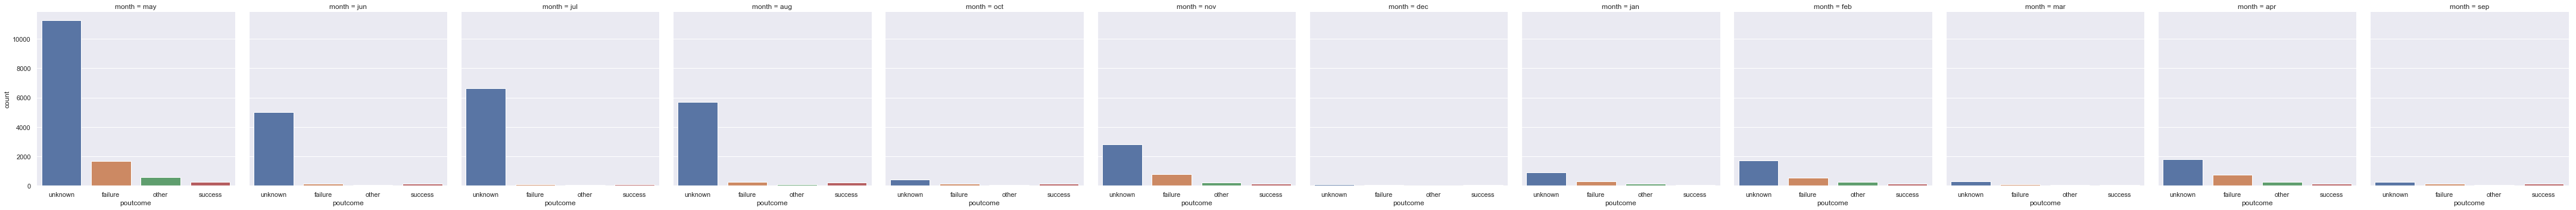

In [7]:
plt.figure(figsize=(15,5))
sns.factorplot(x='poutcome', col='month', data=df_eda, kind='count');

Analysis Result: Inthe month of May and august more people are in considerate situaton for banking products.because alot of countries have august start of fiscal year.

In [138]:
# To visualize the data in percentage.
df_perc=df_eda.groupby('job')['y'].value_counts(normalize=True).reset_index(name='perc')
df_perc['perc']=df_perc['perc']*100

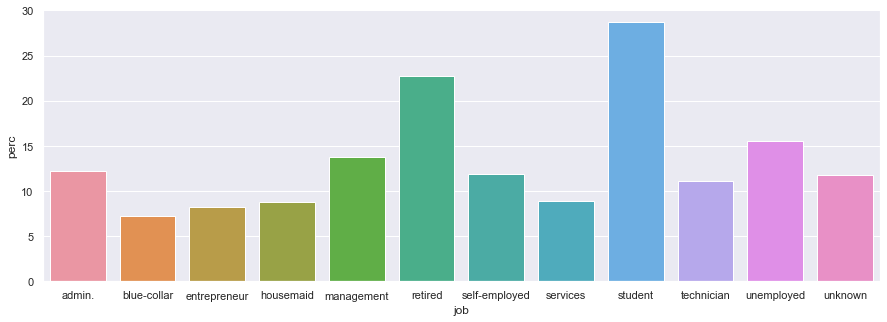

In [139]:
#Plot shows the percentage of unique job values in main data set with only yes value of target variable.
plt.figure(figsize=(15,5))
sns.barplot(x='job', y='perc', data=df_perc[df_perc['y']=='yes'])

Analysis Result: High percentage of students and retired people in our dataset subscribe the term yes. might be campaign offer them the overdraft, underdraft, student loan , or any other banking product which takes care of monthly financial budget.

In [140]:
#data in Percentage 
df_perc=df_eda.groupby('marital')['y'].value_counts(normalize=True).reset_index(name='perc')
df_perc['perc']=df_perc['perc']*100

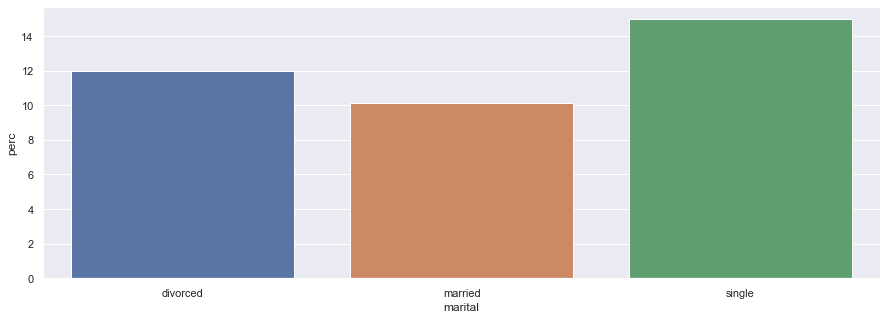

In [141]:
#Plot shows percentage proportion of marital column values with only yes value of target variable.
plt.figure(figsize=(15,5))
sns.barplot(x='marital', y='perc', data=df_perc[df_perc['y']=='yes'])

In [142]:
#Data in percentage ,education column
df_perc=df_eda.groupby('education')['y'].value_counts(normalize=True).reset_index(name='perc')
df_perc['perc']=df_perc['perc']*100

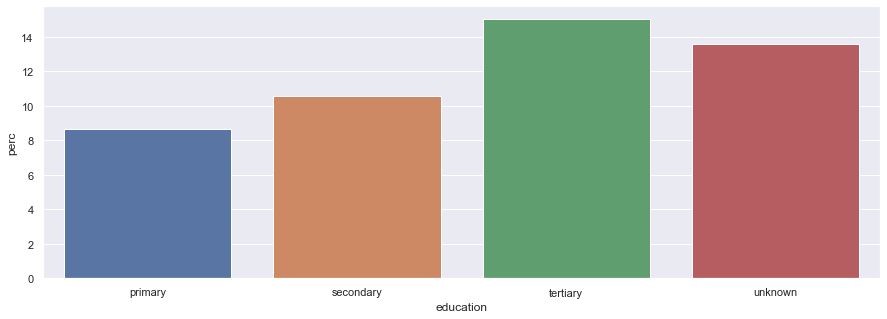

In [143]:
#Plot shows the percentage proportion of education column unique values with only yes value of target variable 
plt.figure(figsize=(15,5))
sns.barplot(x='education', y='perc', data=df_perc[df_perc['y']=='yes'])

In [144]:
#default column data in percentage
df_perc=df_eda.groupby('default')['y'].value_counts(normalize=True).reset_index(name='perc')
df_perc['perc']=df_perc['perc']*100

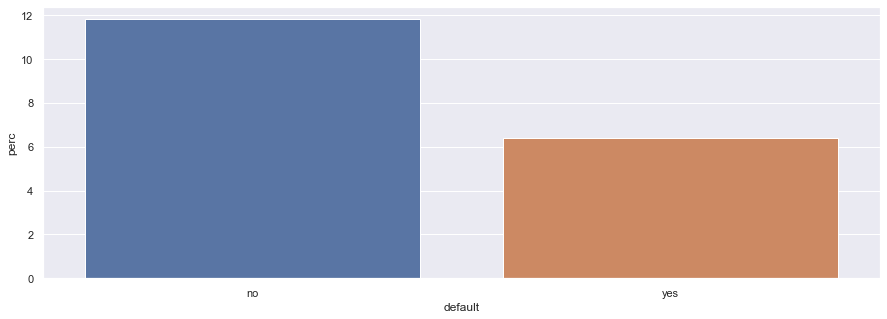

In [145]:
#Plot shows the percentage proportion of defualt column unique values with only yes value of target variable.
plt.figure(figsize=(15,5))
sns.barplot(x='default', y='perc', data=df_perc[df_perc['y']=='yes'])

pecentage proportion of non defaulters on subscribing yes value is good than defaulters subscribing 'yes' in marketing campaign.

In [146]:
#housing column data in percentage
df_perc=df_eda.groupby('housing')['y'].value_counts(normalize=True).reset_index(name='perc')
df_perc['perc']=df_perc['perc']*100

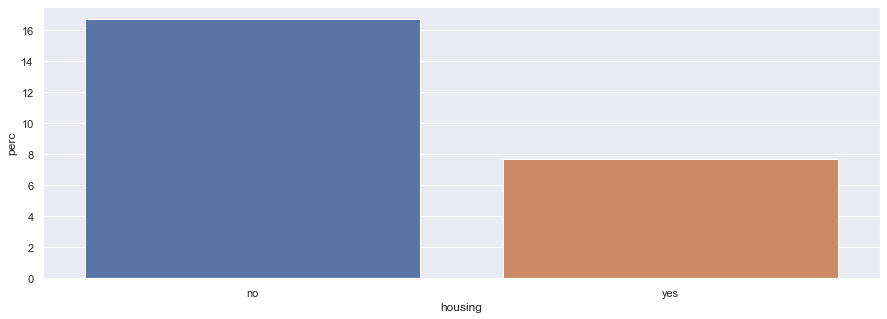

In [147]:
# Plot shows the percentage proportion of housing column unique values with only yes value of target variable.
plt.figure(figsize=(15,5))
sns.barplot(x='housing', y='perc', data=df_perc[df_perc['y']=='yes'])

In [148]:
#loan column data in percentage in terms of yes in y column.
df_perc=df_eda.groupby('loan')['y'].value_counts(normalize=True).reset_index(name='perc')
df_perc['perc']=df_perc['perc']*100

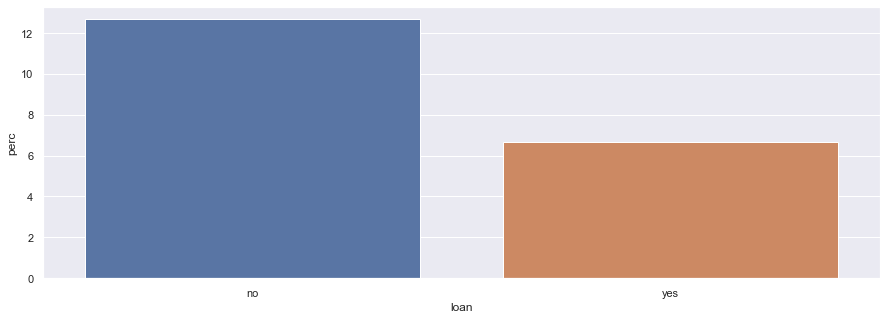

In [149]:
#Plot shows the percentage proportion of loan column unique values with only yes value of target variable.
plt.figure(figsize=(15,5))
sns.barplot(x='loan', y='perc', data=df_perc[df_perc['y']=='yes'])

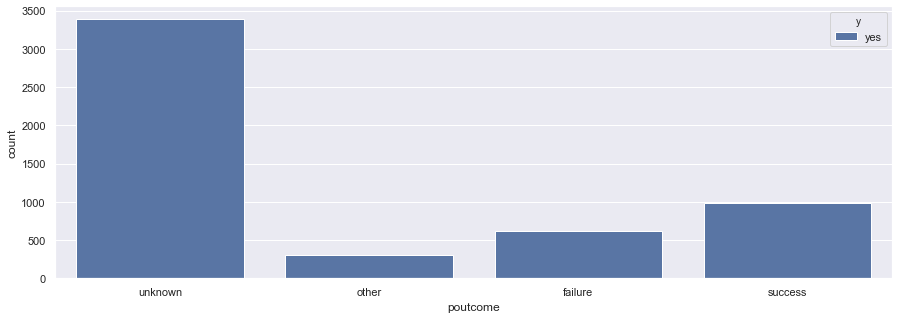

In [151]:
plt.figure(figsize=(15,5))
sns.countplot(x='poutcome', hue='y', data=df_eda[df_eda['y']=='yes'])

In [145]:
#data of poutcome column in pecentage with yes value of y variable.
df_perc=df_eda.groupby('poutcome')['y'].value_counts(normalize=True).reset_index(name='perc')
df_perc['perc']=df_perc['perc']*100

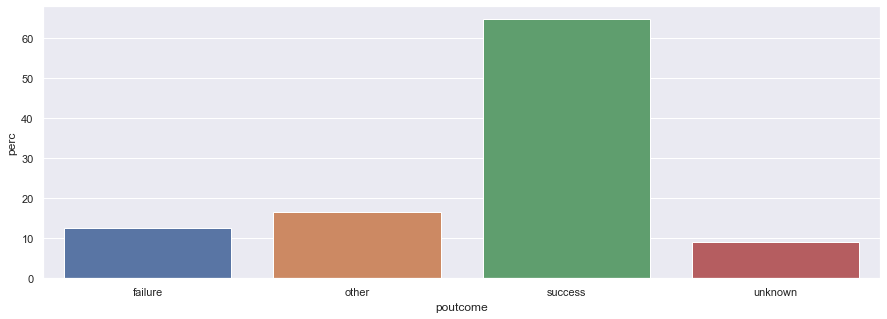

In [146]:
#Plot shows the percentage proportion of poutcome column unique values with only yes value of target variable.
plt.figure(figsize=(15,5))
sns.barplot(x='poutcome', y='perc', data=df_perc[df_perc['y']=='yes'])

Analysis Result: Above plot shows people of unknown and success status from previous campaign are higher in counts which subscribe yes in this campaign.which supports our above analysis of 'concentrate on succes status people of poutcome column.

In [147]:
df_eda.poutcome.value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

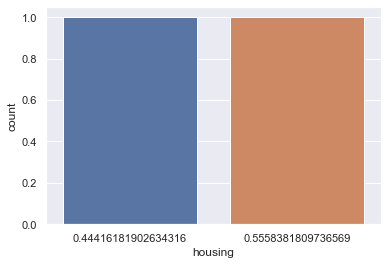

In [148]:
#percentage of people with or without mortgage in our data set.
df_eda.housing.value_counts(normalize=True).to_frame()
sns.countplot(x=df_eda.housing.value_counts(normalize=True).to_frame()['housing'])

In [11]:
df_eda.housing.value_counts(normalize=True)

yes    0.555838
no     0.444162
Name: housing, dtype: float64

Analysis Result: above plot and result shows us that 55% of people have mortgage and 44% are people didn't avail the mortgage in our data 

percentage of unique values in differnt columns of our main data set.

In [150]:
#Age column
df_eda.age.value_counts(normalize=True)

32    0.046117
31    0.044149
33    0.043618
34    0.042689
35    0.041892
        ...   
90    0.000044
92    0.000044
93    0.000044
95    0.000044
94    0.000022
Name: age, Length: 77, dtype: float64

In [151]:
#Job column
df_eda.job.value_counts(normalize=True)

blue-collar      0.215257
management       0.209197
technician       0.168034
admin.           0.114375
services         0.091880
retired          0.050076
self-employed    0.034925
entrepreneur     0.032890
unemployed       0.028820
housemaid        0.027427
student          0.020747
unknown          0.006370
Name: job, dtype: float64

In [152]:
#marital column
df_eda.marital.value_counts(normalize=True)

married     0.601933
single      0.282896
divorced    0.115171
Name: marital, dtype: float64

In [153]:
#education column
df_eda.education.value_counts(normalize=True)

secondary    0.513194
tertiary     0.294198
primary      0.151534
unknown      0.041074
Name: education, dtype: float64

In [154]:
#default column
df_eda.default.value_counts(normalize=True)

no     0.981973
yes    0.018027
Name: default, dtype: float64

Analysis Result: 98% of our data have non defaulters

In [155]:
#balance column
df_eda.balance.value_counts(normalize=True)

0        0.077724
1        0.004313
2        0.003450
4        0.003074
3        0.002964
           ...   
4305     0.000022
6352     0.000022
18881    0.000022
14889    0.000022
7218     0.000022
Name: balance, Length: 7168, dtype: float64

In [158]:
#housing column
df_eda.housing.value_counts(normalize=True)

yes    0.555838
no     0.444162
Name: housing, dtype: float64

In [159]:
#loan column
df_eda.loan.value_counts(normalize=True)

no     0.839774
yes    0.160226
Name: loan, dtype: float64

Analysis Result: our data have 83% of people who didn't avail any loan 

In [160]:
#month column
df_eda.month.value_counts(normalize=True)

may    0.304483
jul    0.152507
aug    0.138174
jun    0.118135
nov    0.087810
apr    0.064851
feb    0.058592
jan    0.031032
oct    0.016323
sep    0.012807
mar    0.010551
dec    0.004733
Name: month, dtype: float64

In [161]:
#Contact Column
df_eda.contact.value_counts(normalize=True)

cellular     0.647741
unknown      0.287983
telephone    0.064276
Name: contact, dtype: float64

In [162]:
#Poutcome column
df_eda.poutcome.value_counts(normalize=True)

unknown    0.817478
failure    0.108403
other      0.040698
success    0.033421
Name: poutcome, dtype: float64

Analysis result: our data  have 81% those people whose previous campaign outcome is unknown.so we can concentrate tose also in this campaign and in furture. 

In [163]:
#Target 'y' column
df_eda.y.value_counts(normalize=True)

no     0.883015
yes    0.116985
Name: y, dtype: float64

Analysis Result: in our data set, only 11% people subscribe the term of yes in this campaign. so by concentrating the analysis results ,we can increase this percentage.

### normalization of data for implementation of classifier or other algorithms

In [14]:
df_cat = df_eda.copy()
df_cat.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


In [167]:
#df_cat_test=df_eda_test.copy()
#df_cat_test.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no


In [168]:
#categorize the age for the purpose of classification
df_cat['agecat'] = ''
df_cat.loc[(df_cat['age']>=18) & (df_cat['age']<=30), 'agecat'] = 'young'
df_cat.loc[(df_cat['age']>29) & (df_cat['age']<=40), 'agecat'] = 'middle-aged'
df_cat.loc[(df_cat['age']>40) & (df_cat['age']<=50), 'agecat'] = 'aged-adults'
df_cat.loc[(df_cat['age']>50) & (df_cat['age']<=60), 'agecat'] = 'old age'
df_cat.loc[df_cat['age']>60, 'agecat'] = 'senior citizen'
df_cat[['age', 'agecat']].head(2)

,age,agecat
0,58,old age
1,44,aged-adults


In [170]:
#showing age category column in main data set.
df_cat.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,agecat
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,old age
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,aged-adults


In [171]:
#Percentage of unique categories in main data set
df_cat.agecat.value_counts(normalize=True)

middle-aged       0.430072
aged-adults       0.248590
old age           0.178430
young             0.116631
senior citizen    0.026277
Name: agecat, dtype: float64

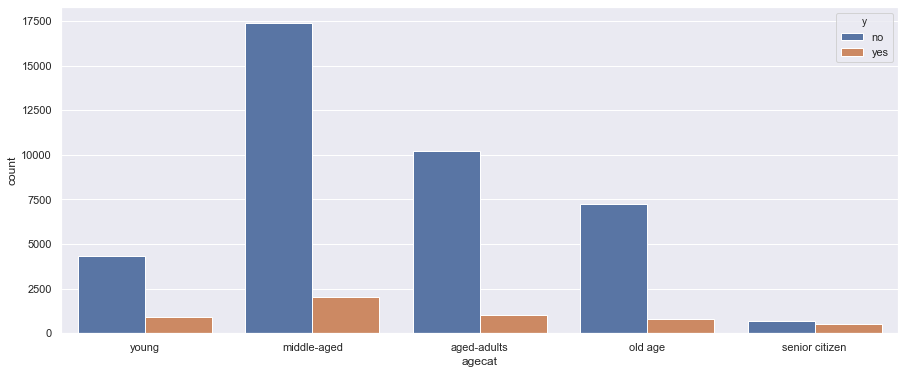

In [173]:
#Plot shows the counts of unique values in age_category with target variable values.
plt.subplots(figsize=(15,6))
sns.countplot(x='agecat', order=['young','middle-aged' ,'aged-adults', 'old age','senior citizen'], hue='y', data=df_cat);

Analysis Result: Middle-aged people with yes target value are high in counts than other. overall middle-aged people are higher in number in our dataset 

In [174]:
df_perc=df_cat.groupby('agecat')['y'].value_counts(normalize=True).reset_index(name='perc')
df_perc['perc']=df_perc['perc']*100

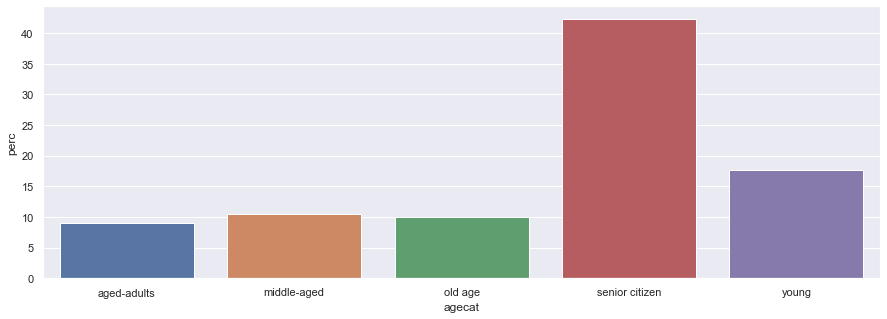

In [175]:
plt.figure(figsize=(15,5))
sns.barplot(x='agecat', y='perc', data=df_perc[df_perc['y']=='yes'])

Analysis result: as we have seen counts of middle-aged people with yes target value wer higher but the above plot tells us that the percentage proportion of senior citizen people with yes is better than all others.

In [176]:
#Poutome and age category data in perfentage.
df_perc=df_cat.groupby('agecat')['poutcome'].value_counts(normalize=True).reset_index(name='perc')
df_perc['perc']=df_perc['perc']*100

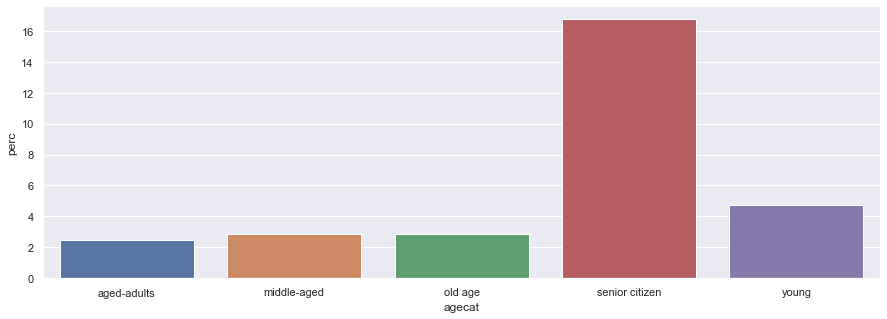

In [177]:
#plot shows the percentage of age-category column values with poutcome vlaue of success.
plt.figure(figsize=(15,5))
sns.barplot(x='agecat', y='perc', data=df_perc[df_perc['poutcome']=='success'])

Analysis result: same results in previous campaign where senior citizen age category people are in better percentage proportion with success value.

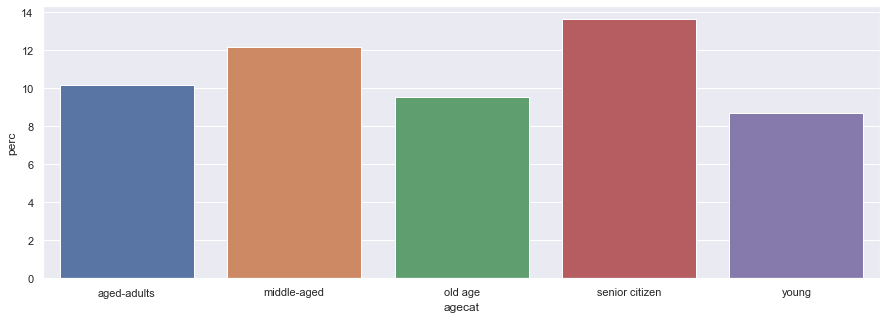

In [178]:
plt.figure(figsize=(15,5))
sns.barplot(x='agecat', y='perc', data=df_perc[df_perc['poutcome']=='failure'])

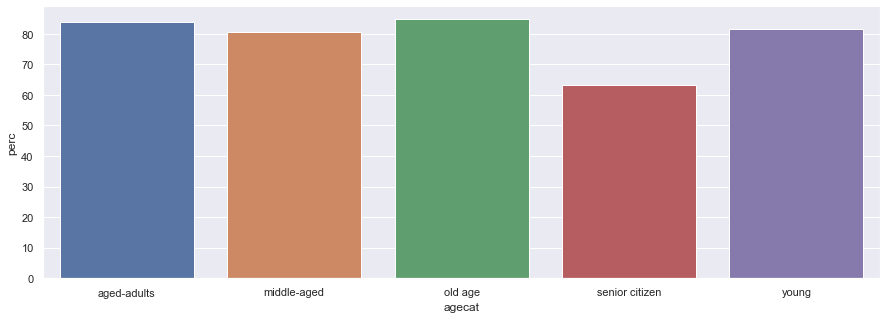

In [179]:
plt.figure(figsize=(15,5))
sns.barplot(x='agecat', y='perc', data=df_perc[df_perc['poutcome']=='unknown'])

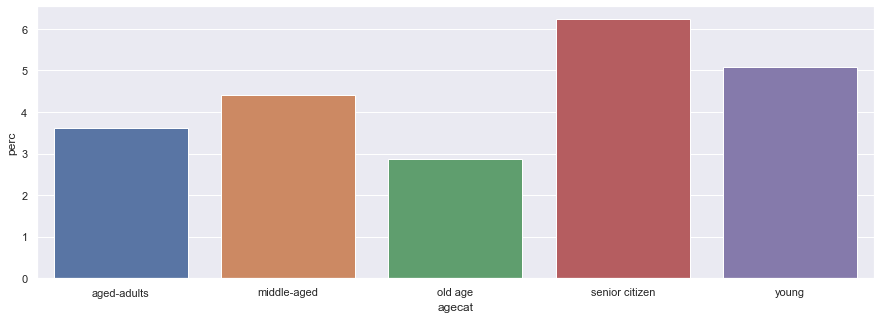

In [180]:
plt.figure(figsize=(15,5))
sns.barplot(x='agecat', y='perc', data=df_perc[df_perc['poutcome']=='other'])

In [181]:
df_cat.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [182]:
# categories of job
df_cat['jobcat'] = ''
df_cat.loc[(df_cat["job"]=="student")|(df_cat["job"]=="unemployed"),"jobcat"]= 'Dependent';
df_cat.loc[(df_cat["job"]=="housemaid")|(df_cat["job"]=="technician")|(df_cat["job"]=="blue-collar")|(df_cat["job"]=="services"),"jobcat"]='Blue-collar';
df_cat.loc[(df_cat["job"]=="admin.")|(df_cat["job"]=="management"),"jobcat"]= 'White-collar';
df_cat.loc[(df_cat["job"]=="entrepreneur")|(df_cat["job"]=="self-employed"),"jobcat"]= 'Bussiness-owner';
df_cat.loc[(df_cat["job"]=="retired"),"jobcat"]='Retired';
df_cat.loc[(df_cat["job"]=="unknown"),"jobcat"]= 'Unknown';
df_cat[['job', 'jobcat']].head(2)

,job,jobcat
0,management,White-collar
1,technician,Blue-collar


In [184]:
#showing age_cat and job_cat columns in main data  set
df_cat.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,agecat,jobcat
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,old age,White-collar
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,aged-adults,Blue-collar


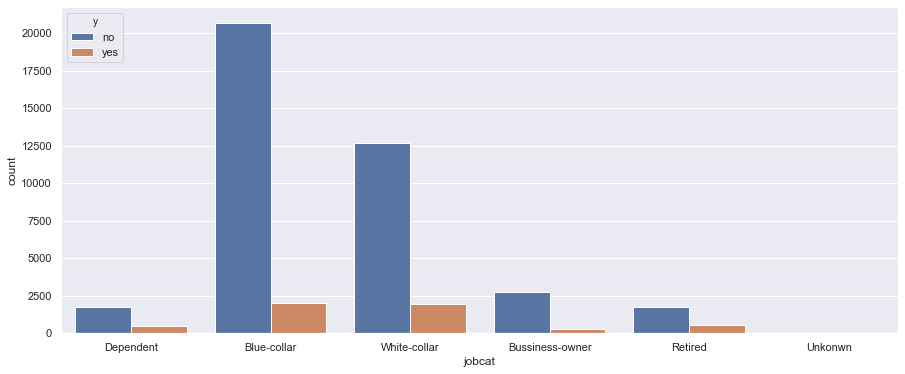

In [185]:
#plot showsthe counts of job_cat column unique values with target variable y.
plt.subplots(figsize=(15,6))
sns.countplot(x='jobcat', order=['Dependent','Blue-collar' ,'White-collar','Bussiness-owner','Retired','Unkonwn'], hue='y', data=df_cat);

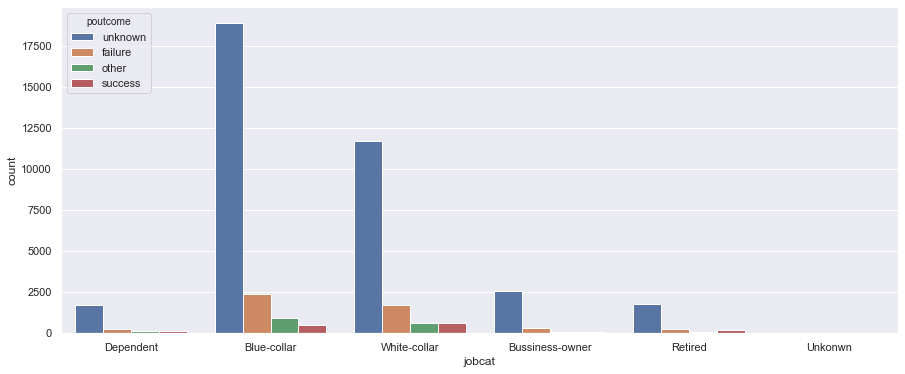

In [186]:
#Plot shows the counts of job_cat column unique values with poutcome values.
plt.subplots(figsize=(15,6))
sns.countplot(x='jobcat', order=['Dependent','Blue-collar' ,'White-collar','Bussiness-owner','Retired','Unkonwn'], hue='poutcome', data=df_cat);

People under white-collar job category are more in counts which subscribe 'yes' in current campaign. white-collar job category people also higher in counts which shows success in previous campaign (poutcome). 

In [187]:
#value counts of unique values job_cat column in main data set 
df_cat.jobcat.value_counts()

Blue-collar        22723
White-collar       14629
Bussiness-owner     3066
Retired             2264
Dependent           2241
Unknown              288
Name: jobcat, dtype: int64

In [189]:
df_cat.jobcat.unique()

array(['White-collar', 'Blue-collar', 'Bussiness-owner', 'Unknown',
       'Retired', 'Dependent'], dtype=object)

In [190]:
#Data in percentage of job_cat unique values with 'y' target variable.
df_perc=df_cat.groupby('jobcat')['y'].value_counts(normalize=True).reset_index(name='perc')
df_perc['perc']=df_perc['perc']*100

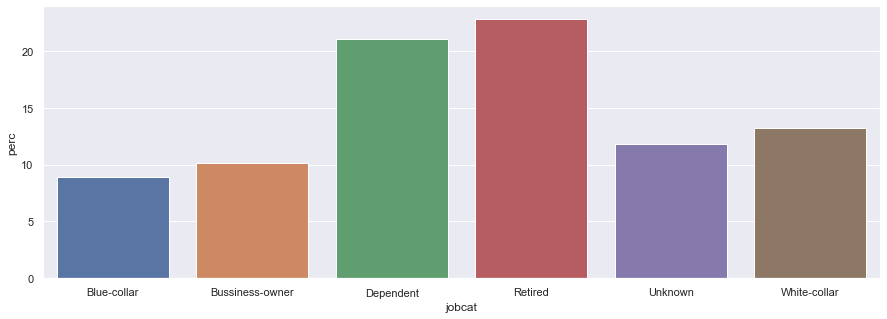

In [191]:
#Plot shows the percentage proportion of job_cat unique values with yes value of target variable 'y'
plt.figure(figsize=(15,5))
sns.barplot(x='jobcat', y='perc', data=df_perc[df_perc['y']=='yes'])

In [192]:
# Percentage for Poutcome and jobcat columns
df_perc=df_cat.groupby('jobcat')['poutcome'].value_counts(normalize=True).reset_index(name='perc')
df_perc['perc']=df_perc['perc']*100

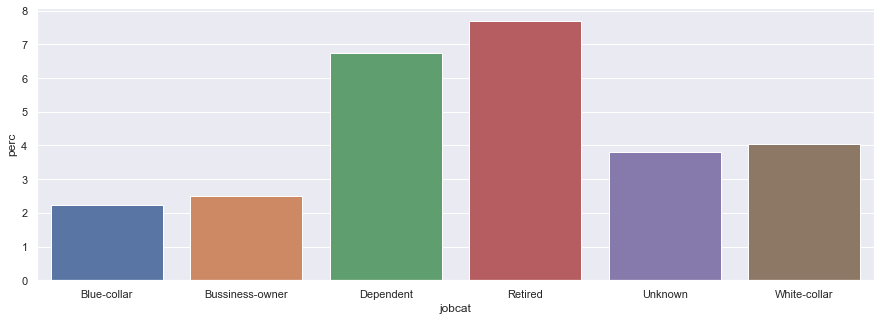

In [193]:
#Plot shows the percentage proportion of job cat column unique values with success value of poutcome column (Previous campaign)
plt.figure(figsize=(15,5))
sns.barplot(x='jobcat', y='perc', data=df_perc[df_perc['poutcome']=='success'])

In [194]:
#Categorize the balance column
df_cat['balcat'] = ''
df_cat.loc[df_cat['balance']<=0, 'balcat'] = '-8019-0'
df_cat.loc[(df_cat['balance']>0) & (df_cat['balance']<=1000), 'balcat'] = '1-1000'
df_cat.loc[(df_cat['balance']>1000) & (df_cat['balance']<=10000), 'balcat'] = '1001-10000'
df_cat.loc[(df_cat['balance']>10000) & (df_cat['balance']<=25000), 'balcat'] = '10001-25000'
df_cat.loc[df_cat['balance']>25000, 'balcat'] = '25000+'
df_cat[['balance', 'balcat']].head(2)

,balance,balcat
0,2143,1001-10000
1,29,1-1000


In [196]:
#Showing agecat, jobcat and balcat in main data set
df_cat.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,agecat,jobcat,balcat
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,old age,White-collar,1001-10000
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,aged-adults,Blue-collar,1-1000


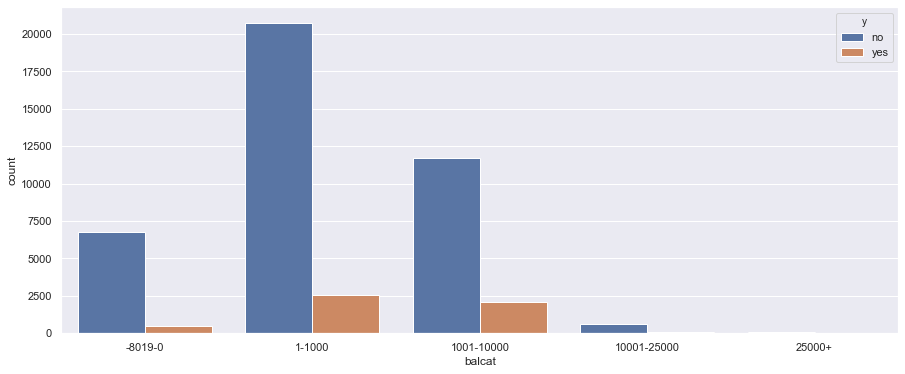

In [197]:
#plot shows the balcat unique values with target variable values.
plt.subplots(figsize=(15,6))
sns.countplot(x='balcat', order=['-8019-0','1-1000' ,'1001-10000', '10001-25000','25000+'], hue='y', data=df_cat);

In [198]:
#unique value counts in percentage of balcat column
df_cat.balcat.value_counts(normalize=True)

1-1000         0.515361
1001-10000     0.305280
-8019-0        0.161023
10001-25000    0.016191
25000+         0.002145
Name: balcat, dtype: float64

In [200]:
#data in percentage of balcat column unique values with target variable
df_perc=df_cat.groupby('balcat')['y'].value_counts(normalize=True).reset_index(name='perc')
df_perc['perc']=df_perc['perc']*100

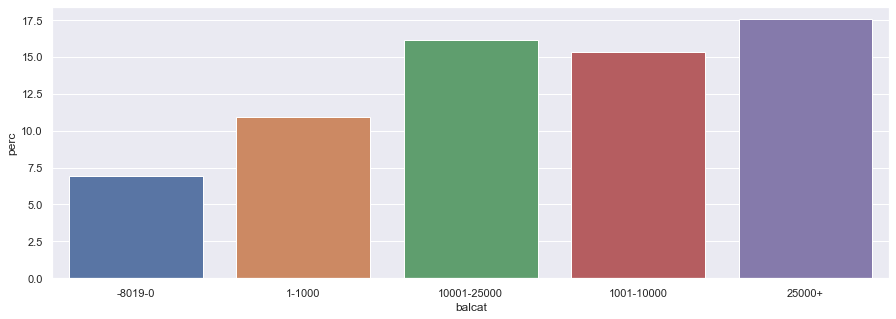

In [201]:
#Plot shows the percentage proportion of balcat unique values with only yes value of target variable 'y'
plt.figure(figsize=(15,5))
sns.barplot(x='balcat', y='perc', data=df_perc[df_perc['y']=='yes'])

In [202]:
#data in pecentage of balcat with poutcome
df_perc=df_cat.groupby('balcat')['poutcome'].value_counts(normalize=True).reset_index(name='perc')
df_perc['perc']=df_perc['perc']*100

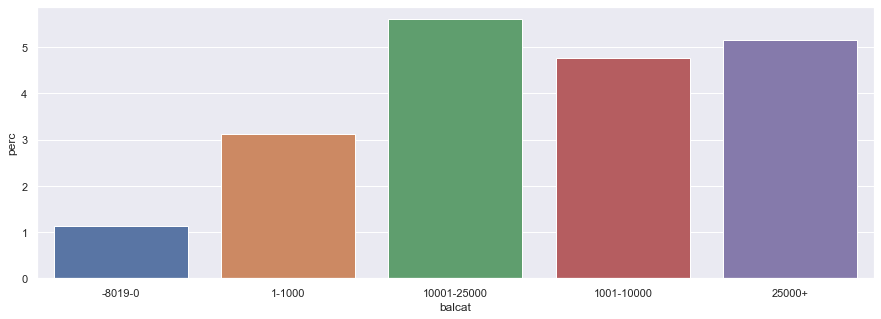

In [203]:
#Plot shows the percentage proportion of balcat with only success value of poutcome variable (Previous campaign outcome)
plt.figure(figsize=(15,5))
sns.barplot(x='balcat', y='perc', data=df_perc[df_perc['poutcome']=='success'])

In [204]:
#categorizing day column
df_cat['daycat'] = ''
df_cat.loc[(df_cat['day']>=1) & (df_cat['day']<=7), 'daycat'] = '1-7'
df_cat.loc[(df_cat['day']>=8) & (df_cat['day']<=14), 'daycat'] = '8-14'
df_cat.loc[(df_cat['day']>=15) & (df_cat['day']<=21), 'daycat'] = '15-21'
df_cat.loc[(df_cat['day']>=22) & (df_cat['day']<=28), 'daycat'] = '22-28'
df_cat.loc[(df_cat['day']>=29) & (df_cat['day']<=31), 'daycat'] = '29-31'
df_cat[['day', 'daycat']].head(2)

,day,daycat
0,5,1-7
1,5,1-7


In [206]:
#showing data set with category columns
df_cat.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,y,agecat,jobcat,balcat,daycat
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,261,1,-1,0,unknown,no,old age,White-collar,1001-10000,1-7
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,151,1,-1,0,unknown,no,aged-adults,Blue-collar,1-1000,1-7


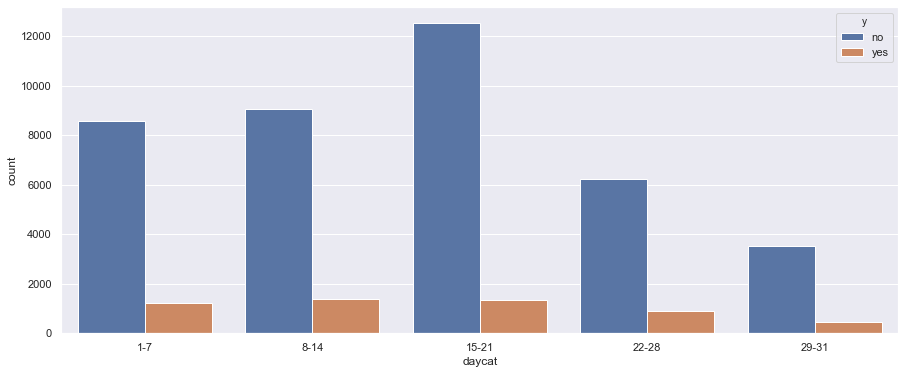

In [207]:
#Plot shows the daycat column unique values with 'y' target variable values
plt.subplots(figsize=(15,6))
sns.countplot(x='daycat', order=['1-7','8-14' ,'15-21', '22-28','29-31'], hue='y', data=df_cat);

In [208]:
#unique value counts percentage in daycat column
df_cat.daycat.value_counts(normalize=True)

15-21    0.307447
8-14     0.230961
1-7      0.216717
22-28    0.157417
29-31    0.087457
Name: daycat, dtype: float64

In [210]:
#percentage data of daycat with target variable 'y'
df_perc=df_cat.groupby('daycat')['y'].value_counts(normalize=True).reset_index(name='perc')
df_perc['perc']=df_perc['perc']*100

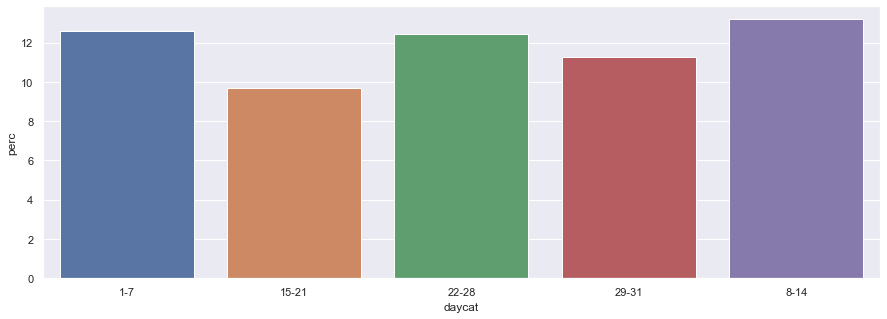

In [211]:
#Plot shows the percentage proportion of daycat unique values with only yes value of target variable 'y'.
plt.figure(figsize=(15,5))
sns.barplot(x='daycat', y='perc', data=df_perc[df_perc['y']=='yes'])

In [215]:
#categorizing month column in fiscal quarters
df_cat['monthcat'] = ''
df_cat.loc[(df_cat["month"]=="aug")|(df_cat["month"]=="sep")|(df_cat["month"]=="oct"),"monthcat"]=1
df_cat.loc[(df_cat["month"]=="nov")|(df_cat["month"]=="dec")|(df_cat["month"]=="jan"),"monthcat"]=2
df_cat.loc[(df_cat["month"]=="feb")|(df_cat["month"]=="mar")|(df_cat["month"]=="apr"),"monthcat"]=3
df_cat.loc[(df_cat["month"]=="may")|(df_cat["month"]=="jun")|(df_cat["month"]=="jul"),"monthcat"]=4
df_cat[['month', 'monthcat']].head(2)

,month,monthcat
0,may,4
1,may,4


In [217]:
#Showing data with category columns
df_cat.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,y,agecat,jobcat,balcat,daycat,monthcat
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,1,-1,0,unknown,no,old age,White-collar,1001-10000,1-7,4
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,1,-1,0,unknown,no,aged-adults,Blue-collar,1-1000,1-7,4


In [218]:
#unique value counts in monthcat column
df_cat.monthcat.value_counts()

4    26002
1     7564
3     6058
2     5587
Name: monthcat, dtype: int64

In [220]:
#categorize duration column 
df_cat['durationcat'] = ''
df_cat.loc[(df_cat['duration']>=0) & (df_cat['duration']<=120), 'durationcat'] = '1-2'
df_cat.loc[(df_cat['duration']>=121) & (df_cat['duration']<=240), 'durationcat'] = '3-4'
df_cat.loc[(df_cat['duration']>=241) & (df_cat['duration']<=360), 'durationcat'] = '5-6'
df_cat.loc[(df_cat['duration']>=361) & (df_cat['duration']<=480), 'durationcat'] = '7-8'
df_cat.loc[(df_cat['duration']>=481) & (df_cat['duration']<=600), 'durationcat'] = '9-10'
df_cat.loc[df_cat['duration']>600, 'durationcat'] = '10+'
df_cat[['duration', 'durationcat']].head(2)

,duration,durationcat
0,261,5-6
1,151,3-4


In [223]:
#unique value counts in durationcat
df_cat.durationcat.value_counts()

3-4     14650
1-2     14044
5-6      7163
10+      3790
7-8      3595
9-10     1969
Name: durationcat, dtype: int64

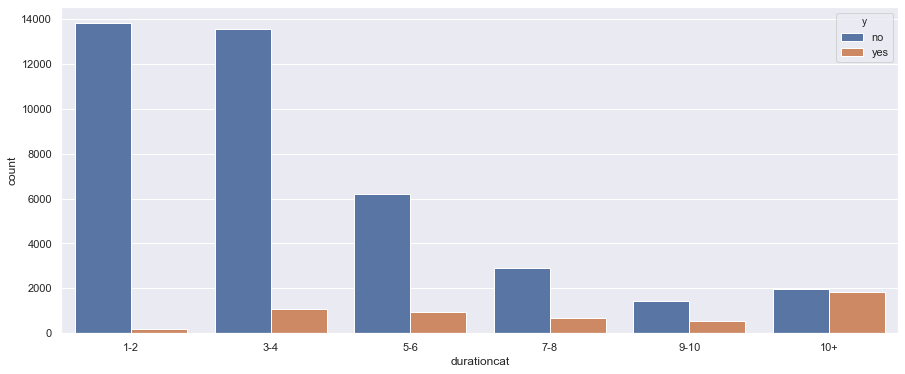

In [225]:
#Plot shows the duration cat unique value counts with target variable values
plt.subplots(figsize=(15,6))
sns.countplot(x='durationcat', order=['1-2','3-4' ,'5-6', '7-8','9-10','10+'], hue='y', data=df_cat);

In [226]:
#Percentage of unique values in durationcat column
df_cat.durationcat.value_counts(normalize=True)

3-4     0.324036
1-2     0.310632
5-6     0.158435
10+     0.083829
7-8     0.079516
9-10    0.043551
Name: durationcat, dtype: float64

In [228]:
#Percentage data of durationcat column with target variable 'y' values.
df_perc=df_cat.groupby('durationcat')['y'].value_counts(normalize=True).reset_index(name='perc')
df_perc['perc']=df_perc['perc']*100

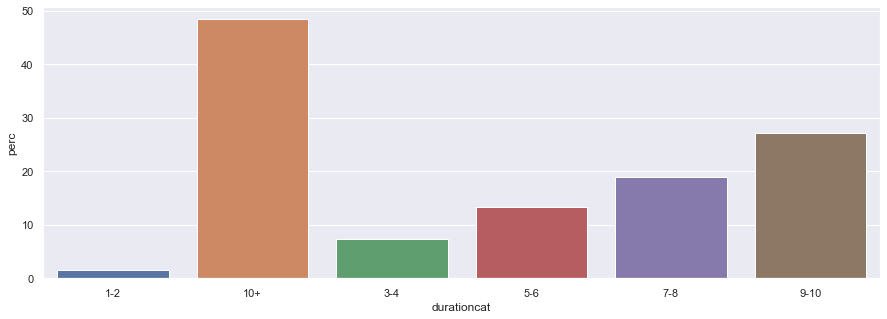

In [229]:
#Plot shows the percentage proportion of duration cat values with only yes value of target variable .
plt.figure(figsize=(15,5))
sns.barplot(x='durationcat', y='perc', data=df_perc[df_perc['y']=='yes'])

In [230]:
#Categorize the campaign column.
df_cat['campaigncat'] = ''
df_cat.loc[(df_cat['campaign']>=1) & (df_cat['campaign']<=5), 'campaigncat'] = '1-5'
df_cat.loc[(df_cat['campaign']>=6) & (df_cat['campaign']<=10), 'campaigncat'] = '6-10'
df_cat.loc[(df_cat['campaign']>=11) & (df_cat['campaign']<=15), 'campaigncat'] = '11-15'
df_cat.loc[(df_cat['campaign']>=16) & (df_cat['campaign']<=20), 'campaigncat'] = '16-20'
df_cat.loc[(df_cat['campaign']>=21) & (df_cat['campaign']<=25), 'campaigncat'] = '21-25'
df_cat.loc[df_cat['campaign']>25, 'campaigncat'] = '25+'
df_cat[['campaign', 'campaigncat']].head(2)

,campaign,campaigncat
0,1,1-5
1,1,1-5


In [234]:
#unique value counts in campaigncat column
df_cat.campaigncat.value_counts()

1-5      40856
6-10      3159
11-15      666
16-20      286
21-25      122
25+        122
Name: campaigncat, dtype: int64

In [236]:
#Percentage of unique values in campaigncat column
df_cat.campaigncat.value_counts(normalize=True)

1-5      0.903674
6-10     0.069872
11-15    0.014731
16-20    0.006326
21-25    0.002698
25+      0.002698
Name: campaigncat, dtype: float64

In [237]:
# Percentage of campaigncat column values with target variable.
df_perc=df_cat.groupby('campaigncat')['y'].value_counts(normalize=True).reset_index(name='perc')
df_perc['perc']=df_perc['perc']*100

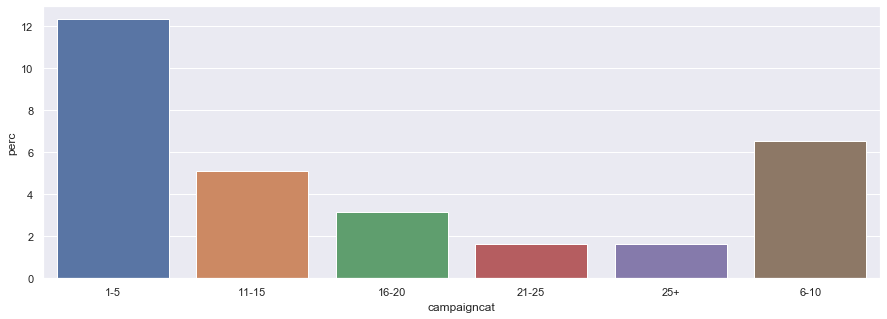

In [238]:
#Plot shows the percentage proportion of campaigncat columnn unique values with only yes value of target variable y.
plt.figure(figsize=(15,5))
sns.barplot(x='campaigncat', y='perc', data=df_perc[df_perc['y']=='yes'])

In [239]:
#Categorize pdays column
df_cat['pdayscat'] =''
df_cat.loc[(df_cat['pdays']>=-1) & (df_cat['pdays']<=0), 'pdayscat'] = 'no contact'
df_cat.loc[(df_cat['pdays']>=1) & (df_cat['pdays']<=100), 'pdayscat'] = '1-100'
df_cat.loc[(df_cat['pdays']>=101) & (df_cat['pdays']<=200), 'pdayscat'] = '101-200'
df_cat.loc[(df_cat['pdays']>=201) & (df_cat['pdays']<=300), 'pdayscat'] = '201-300'
df_cat.loc[(df_cat['pdays']>=301) & (df_cat['pdays']<=871), 'pdayscat'] = '301+'
df_cat[['pdays', 'pdayscat']].head(2)

,pdays,pdayscat
0,-1,no contact
1,-1,no contact


In [241]:
#unique values in pdayscat column
df_cat.pdayscat.unique()

array(['no contact', '101-200', '1-100', '201-300', '301+'], dtype=object)

In [242]:
#counts of unique values in pdayscat column
df_cat.pdayscat.value_counts()

no contact    36954
101-200        2866
301+           2470
201-300        1484
1-100          1437
Name: pdayscat, dtype: int64

In [244]:
#Percentage of unique values in pdayscat column
df_cat.pdayscat.value_counts(normalize=True)

no contact    0.817367
101-200       0.063392
301+          0.054633
201-300       0.032824
1-100         0.031784
Name: pdayscat, dtype: float64

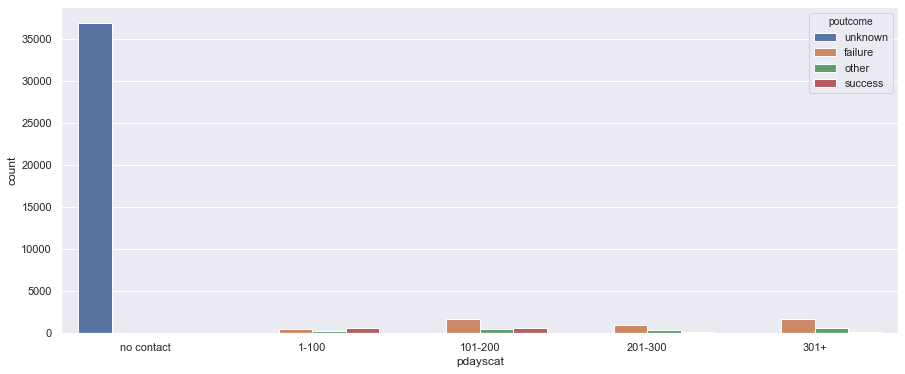

In [245]:
#Plot shows the counts of pdayscat unique values with poutcome values.
plt.subplots(figsize=(15,6))
sns.countplot(x='pdayscat', order=['no contact','1-100' ,'101-200', '201-300','301+'], hue='poutcome', data=df_cat);

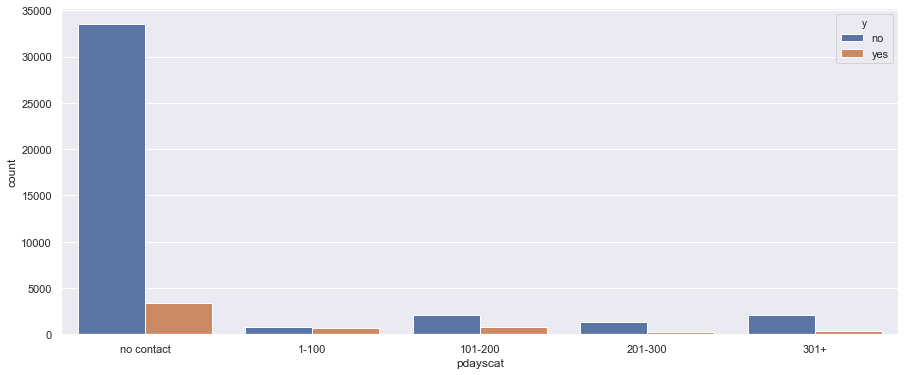

In [246]:
#Plot shows the overall count of pdayscat column values.
plt.subplots(figsize=(15,6))
sns.countplot(x='pdayscat', order=['no contact','1-100' ,'101-200', '201-300','301+'], hue='y', data=df_cat);

In [247]:
#categorize the previous column
df_cat['previouscat'] =''
df_cat.loc[(df_cat['previous']==0) , 'previouscat'] = '0'
df_cat.loc[(df_cat['previous']>=1) & (df_cat['previous']<=50), 'previouscat'] = '1-50'
df_cat.loc[(df_cat['previous']>=51) & (df_cat['previous']<=100), 'previouscat'] = '51-100'
df_cat.loc[(df_cat['previous']>=101) & (df_cat['previous']<=150), 'previouscat'] = '101-150'
df_cat.loc[(df_cat['previous']>=151) & (df_cat['previous']<=200), 'previouscat'] = '151-200'
df_cat.loc[(df_cat['previous']>=201) & (df_cat['previous']<=275), 'previouscat'] = '201-275'
df_cat[['previous', 'previouscat']].head(2)

,previous,previouscat
0,0,0
1,0,0


In [249]:
#unique values in previouscat column
df_cat.previouscat.unique()

array(['0', '1-50', '51-100', '201-275'], dtype=object)

In [250]:
#Counts of unique values in previouscat column
df_cat.previouscat.value_counts()

0          36954
1-50        8253
51-100         3
201-275        1
Name: previouscat, dtype: int64

In [252]:
#Pecentage of values in previouscat column
df_cat.previouscat.value_counts(normalize=True)

0          0.817367
1-50       0.182544
51-100     0.000066
201-275    0.000022
Name: previouscat, dtype: float64

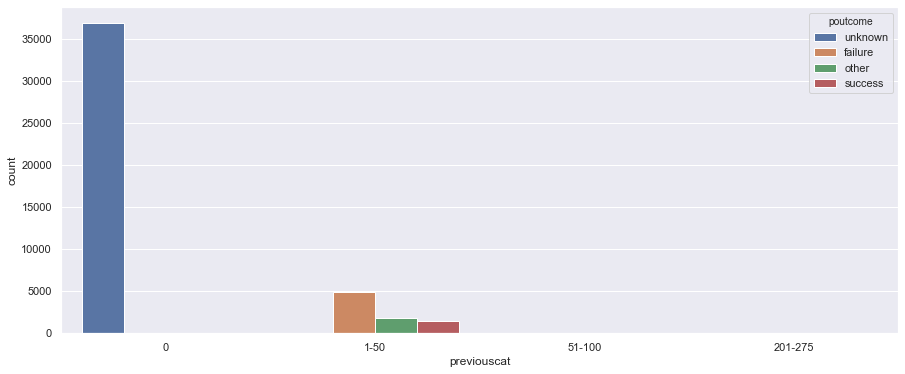

In [253]:
#Plot shows counts of previouscat unique values with poutcome variable values.
plt.subplots(figsize=(15,6))
sns.countplot(x='previouscat', order=['0','1-50' ,'51-100', '201-275'], hue='poutcome', data=df_cat);

In [254]:
#Showing first 2 rows of categorized main dataset
df_cat.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,...,y,agecat,jobcat,balcat,daycat,monthcat,durationcat,campaigncat,pdayscat,previouscat
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,no,old age,White-collar,1001-10000,1-7,4,5-6,1-5,no contact,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,no,aged-adults,Blue-collar,1-1000,1-7,4,3-4,1-5,no contact,0


### Feature selection through feature engineering

In [257]:
#for transform values into label categories
from sklearn.preprocessing import LabelEncoder

In [258]:
df=df_cat.copy()

In [259]:
# transform  following location values(i.e white-collar job into category 5 in jobcat column)
lab_en = LabelEncoder()
df.iloc[:,2] = lab_en.fit_transform(df.iloc[:,2])
df.iloc[:,3] = lab_en.fit_transform(df.iloc[:,3])
df.iloc[:,4] = lab_en.fit_transform(df.iloc[:,4])
df.iloc[:,6] = lab_en.fit_transform(df.iloc[:,6])
df.iloc[:,7] = lab_en.fit_transform(df.iloc[:,7])
df.iloc[:,8] = lab_en.fit_transform(df.iloc[:,8])
df.iloc[:,15] = lab_en.fit_transform(df.iloc[:,15])
df.iloc[:,16] = lab_en.fit_transform(df.iloc[:,16])
df.iloc[:,17] = lab_en.fit_transform(df.iloc[:,17])
df.iloc[:,18] = lab_en.fit_transform(df.iloc[:,18])
df.iloc[:,19] = lab_en.fit_transform(df.iloc[:,19])
df.iloc[:,20] = lab_en.fit_transform(df.iloc[:,20])
df.iloc[:,21] = lab_en.fit_transform(df.iloc[:,21])
df.iloc[:,22] = lab_en.fit_transform(df.iloc[:,22])
df.iloc[:,23] = lab_en.fit_transform(df.iloc[:,23])
df.iloc[:,24] = lab_en.fit_transform(df.iloc[:,24])
df.iloc[:,25] = lab_en.fit_transform(df.iloc[:,25])

In [260]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,y,agecat,jobcat,balcat,daycat,monthcat,durationcat,campaigncat,pdayscat,previouscat
0,58,management,1,2,0,2143,1,0,2,5,...,0,2,5,3,0,3,3,0,4,0
1,44,technician,2,1,0,29,1,0,2,5,...,0,0,0,1,0,3,2,0,4,0
2,33,entrepreneur,1,1,0,2,1,1,2,5,...,0,1,1,1,0,3,0,0,4,0
3,47,blue-collar,1,3,0,1506,1,0,2,5,...,0,0,0,3,0,3,0,0,4,0
4,33,unknown,2,3,0,1,0,0,2,5,...,0,1,4,1,0,3,2,0,4,0


In [560]:
df_cat.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,y,agecat,jobcat,balcat,daycat,monthcat,durationcat,campaigncat,pdayscat,previouscat
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,no,old age,White-collar,1001-10000,1-7,4,5-6,1-5,no contact,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,no,aged-adults,Blue-collar,1-1000,1-7,4,3-4,1-5,no contact,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,no,middle-aged,Bussiness-owner,1-1000,1-7,4,1-2,1-5,no contact,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,no,aged-adults,Blue-collar,1001-10000,1-7,4,1-2,1-5,no contact,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,no,middle-aged,Unknown,1-1000,1-7,4,3-4,1-5,no contact,0


In [15]:
df_eda.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


df_eda stores our main before processing dataset.df_cat stores the data which is categorized.df stores the transformed,normalized, cleaned datset after droping 'age,job,balance,day,monthduration,campaign,pdaysand previous column for different algorithms implementation.On df data set , we not only implement classification algortihms but can implement regression, clustering or association mining algorithms for predictive or descriptive analysis.

In [261]:
df_w=df.drop(['age','job','balance','day','month','duration','campaign','pdays','previous'],axis=1)

In [262]:
df_w.head()

,marital,education,default,housing,loan,contact,poutcome,y,agecat,jobcat,balcat,daycat,monthcat,durationcat,campaigncat,pdayscat,previouscat
0,1,2,0,1,0,2,3,0,2,5,3,0,3,3,0,4,0
1,2,1,0,1,0,2,3,0,0,0,1,0,3,2,0,4,0
2,1,1,0,1,1,2,3,0,1,1,1,0,3,0,0,4,0
3,1,3,0,1,0,2,3,0,0,0,3,0,3,0,0,4,0
4,2,3,0,0,0,2,3,0,1,4,1,0,3,2,0,4,0


In [263]:
df_w.describe()

,marital,education,default,housing,loan,contact,poutcome,y,agecat,jobcat,balcat,daycat,monthcat,durationcat,campaigncat,pdayscat,previouscat
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,1.167725,1.224813,0.018027,0.555838,0.160226,0.640242,2.559974,0.116985,1.332286,1.960518,1.472164,1.808498,2.116941,1.743027,0.395634,3.562407,0.182787
std,0.608230,0.747997,0.133049,0.496878,0.366820,0.897951,0.989059,0.321406,1.213023,2.250437,1.093037,1.465944,1.163733,1.459052,1.303003,1.036117,0.387068
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,1.000000,3.000000,2.000000,0.000000,4.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,2.000000,3.000000,0.000000,2.000000,5.000000,3.000000,3.000000,3.000000,3.000000,0.000000,4.000000,0.000000
max,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,4.000000,5.000000,4.000000,4.000000,3.000000,5.000000,5.000000,4.000000,3.000000


In [564]:
#export the csv file for implementation of algorithms for classification, regression or clustering purpose
df_w.to_csv('wrangledbank.csv',index=False)

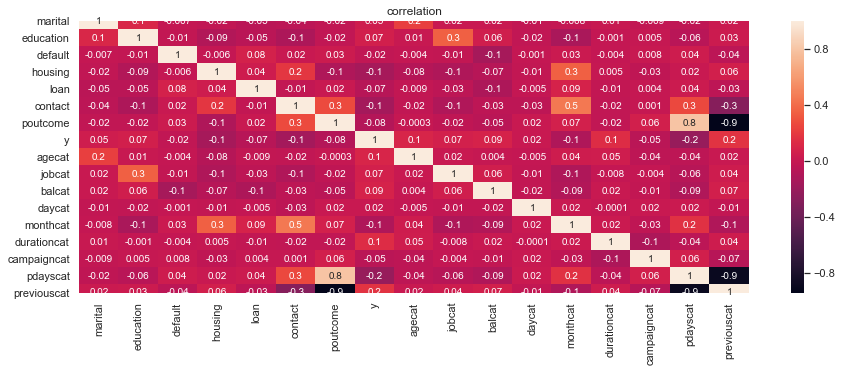

In [280]:
#For feature correlation we use heatmap.
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.title('correlation')
sns.heatmap(df_w.corr(),annot=True, fmt='.1g')

In [281]:
df_w.corr()

,marital,education,default,housing,loan,contact,poutcome,y,agecat,jobcat,balcat,daycat,monthcat,durationcat,campaigncat,pdayscat,previouscat
marital,1.000000,0.108576,-0.007023,-0.016096,-0.046893,-0.039201,-0.016850,0.045588,0.223508,0.016570,0.017719,-0.013045,-0.007742,0.013649,-0.009045,-0.024595,0.024984
education,0.108576,1.000000,-0.010718,-0.090790,-0.048574,-0.110928,-0.019361,0.066241,0.013033,0.349189,0.057596,-0.019861,-0.125924,-0.001219,0.004942,-0.060514,0.032786
default,-0.007023,-0.010718,1.000000,-0.006025,0.077234,0.015404,0.034898,-0.022419,-0.003675,-0.012398,-0.137467,-0.001012,0.025670,-0.004167,0.008237,0.039734,-0.039502
housing,-0.016096,-0.090790,-0.006025,1.000000,0.041323,0.188123,-0.099971,-0.139173,-0.076199,-0.102324,-0.067219,-0.009977,0.349182,0.005026,-0.028844,0.017688,0.063893
loan,-0.046893,-0.048574,0.077234,0.041323,1.000000,-0.010873,0.015458,-0.068185,-0.008852,-0.032475,-0.108753,-0.005049,0.085904,-0.009650,0.003565,0.036020,-0.031019
contact,-0.039201,-0.110928,0.015404,0.188123,-0.010873,1.000000,0.272214,-0.148395,-0.022223,-0.095263,-0.031624,-0.032107,0.453483,-0.016067,0.001191,0.258366,-0.287647
poutcome,-0.016850,-0.019361,0.034898,-0.099971,0.015458,0.272214,1.000000,-0.077840,-0.000267,-0.023844,-0.049693,0.021041,0.074398,-0.018872,0.062675,0.798279,-0.940359
y,0.045588,0.066241,-0.022419,-0.139173,-0.068185,-0.148395,-0.077840,1.000000,0.103400,0.068097,0.087877,0.018677,-0.102041,0.142168,-0.052632,-0.208732,0.167527
agecat,0.223508,0.013033,-0.003675,-0.076199,-0.008852,-0.022223,-0.000267,0.103400,1.000000,0.020793,0.004015,-0.004504,0.038314,0.049997,-0.037597,-0.035058,0.021434
jobcat,0.016570,0.349189,-0.012398,-0.102324,-0.032475,-0.095263,-0.023844,0.068097,0.020793,1.000000,0.056487,-0.009593,-0.104478,-0.007819,-0.004313,-0.062240,0.037741


In [3]:
#df_w is saved as wrangledbank.csv in my system
data = pd.read_csv("wrangledbank.csv")
df = data.copy()
df.head()

,marital,education,default,housing,loan,contact,poutcome,y,agecat,balcat,daycat,monthcat,durationcat,campaigncat,pdayscat,previouscat,jobcat
0,1,2,0,1,0,2,3,0,3,3,0,3,3,0,4,0,5
1,2,1,0,1,0,2,3,0,2,1,0,3,2,0,4,0,0
2,1,1,0,1,1,2,3,0,1,1,0,3,0,0,4,0,1
3,1,3,0,1,0,2,3,0,2,3,0,3,0,0,4,0,0
4,2,3,0,0,0,2,3,0,1,1,0,3,2,0,4,0,4
